In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
experiment_setup_name = "tutorial.gym.atari.BankHeist-v0.cnn"

#gym game title
GAME_TITLE = 'BankHeist-v0'
#how many parallel game instances can your machine tolerate
N_PARALLEL_GAMES = 1

#how long is one replay session from a batch
#since we have window-like memory (no recurrent layers), we can use relatively small session weights
replay_seq_len = 50 
replay_batch_size = 50
pool_size = 150

#theano device selection. GPU is, as always, in preference, but not required
%env THEANO_FLAGS='device=gpu0'

env: THEANO_FLAGS='device=gpu0'


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import theano
import theano.tensor as T
import os
import pickle

%matplotlib inline

Using gpu device 0: Tesla K40m (CNMeM is disabled, cuDNN Version is too old. Update to v5, was 4004.)


## Loading the game

[2016-06-28 12:13:45,883] Making new env: BankHeist-v0


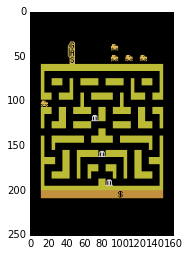

In [4]:
import gym
atari = gym.make(GAME_TITLE)
atari.reset()
plt.imshow(atari.render('rgb_array'))

In [5]:
n_actions = atari.action_space.n
observation_shape = (None,) + atari.observation_space.shape
action_names = atari.get_action_meanings()
print action_names

['NOOP', 'FIRE', 'UP', 'RIGHT', 'LEFT', 'DOWN', 'UPRIGHT', 'UPLEFT', 'DOWNRIGHT', 'DOWNLEFT', 'UPFIRE', 'RIGHTFIRE', 'LEFTFIRE', 'DOWNFIRE', 'UPRIGHTFIRE', 'UPLEFTFIRE', 'DOWNRIGHTFIRE', 'DOWNLEFTFIRE']


In [6]:
del atari

In [7]:
from agentnet.experiments.openai_gym.pool import GamePool

pool = GamePool(GAME_TITLE, N_PARALLEL_GAMES)

[2016-06-28 12:13:46,253] Making new env: BankHeist-v0


## Agent initialization

In [9]:
from RL_agents import BasicRLAgent
from agentnet.utils.persistence import save,load

In [11]:
my_agent = BasicRLAgent(pool, observation_shape, n_actions)

## Evaluator initialization

In [12]:
from Evaluator import Evaluator

In [13]:
test_env = gym.make(GAME_TITLE)

[2016-06-28 12:18:20,899] Making new env: BankHeist-v0


In [14]:
evaluator = Evaluator(test_env, my_agent.step)

## Loading previuos results

In [15]:
from agentnet.utils.persistence import save,load
load(my_agent.resolver, "no_exp_last.pcl")

In [16]:
rws = pickle.load(open('no_exp_reward_log.pcl', 'rb'))
s_rws = pickle.load(open('no_exp_score_log.pcl', 'rb'))
time = pickle.load(open('no_exp_time_log.pcl', 'rb'))

In [17]:
for key in rws['Mean episode reward'].keys():
    evaluator.reward_log['Mean episode reward'][key] = rws['Mean episode reward'][key]
for key in s_rws['greedy_reward'].keys():
    evaluator.score_log['greedy reward'][key] = s_rws['greedy_reward'][key]
for key in time['Mean episode life time'].keys():
    evaluator.life_time_log['Mean episode life time'][key] = time['Mean episode life time'][key]

## Traininig loop

In [18]:
epoch_counter = max( rws['Mean episode reward'].keys())
#epoch_counter = 0

0.0 1283
0.0 1539
20.0 1580
0.0 1629
20.0 1834
30.0 1148
20.0 1163
120.0 898
10.0 1108
0.0 1690


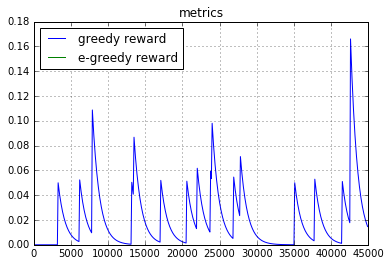

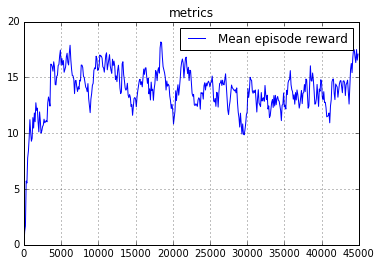

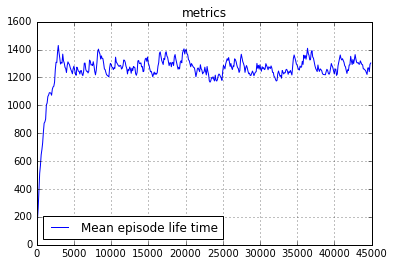

20.0 1086
10.0 1118
20.0 744
10.0 1586
10.0 958
30.0 1201
40.0 699
20.0 938
10.0 1214
0.0 1159


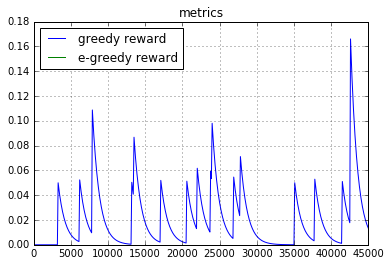

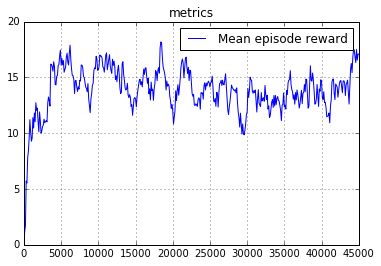

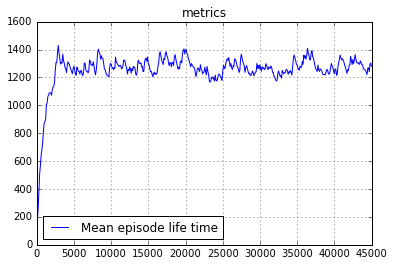

10.0 1073
20.0 928
20.0 1114
10.0 1220
0.0 1531
20.0 1162
20.0 1197
10.0 1578
40.0 1074
20.0 1230


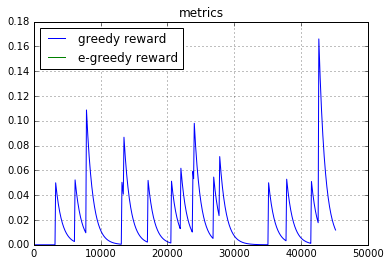

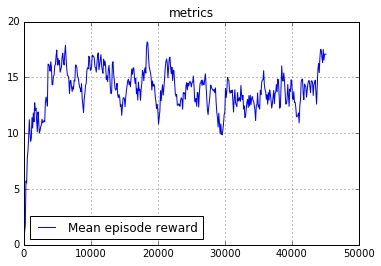

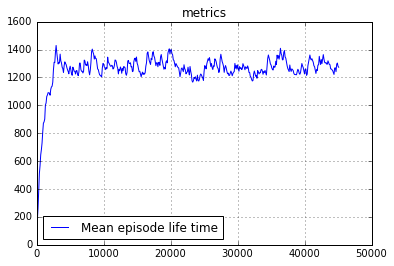

0.0 2047
0.0 690
0.0 1616
0.0 1561
0.0 1352
0.0 762
0.0 1736
0.0 2049
0.0 1798
0.0 1536


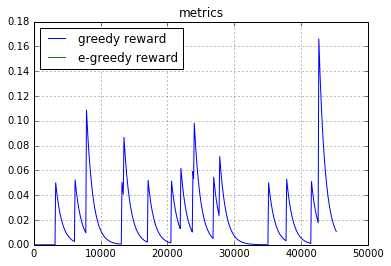

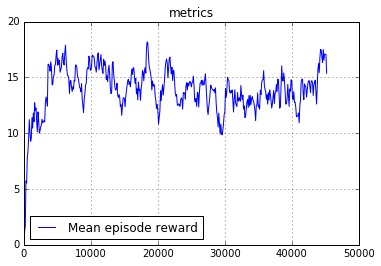

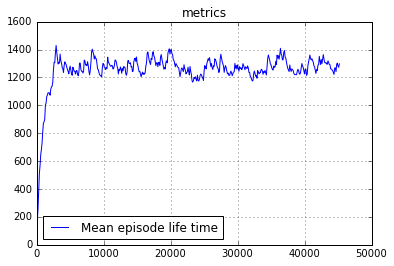

0.0 1197
0.0 885
0.0 1478
0.0 981
0.0 1435
10.0 1657
0.0 468
0.0 1388
0.0 996
0.0 1652


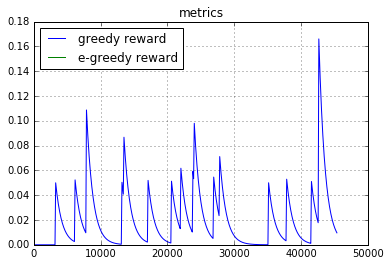

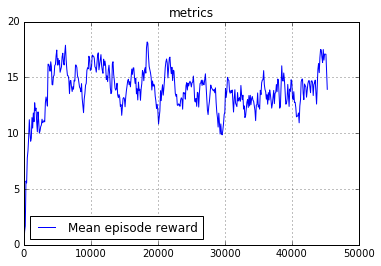

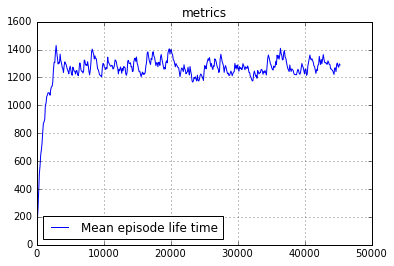

20.0 788
10.0 1841
0.0 1822
10.0 2174
0.0 2134
0.0 1007
0.0 1513
0.0 2521
10.0 1218
0.0 2118


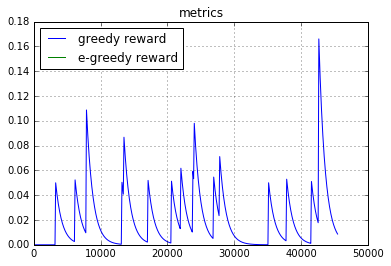

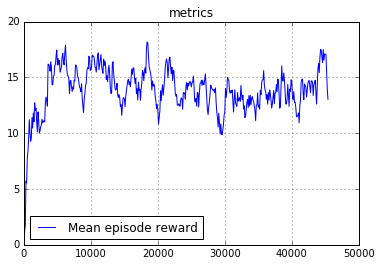

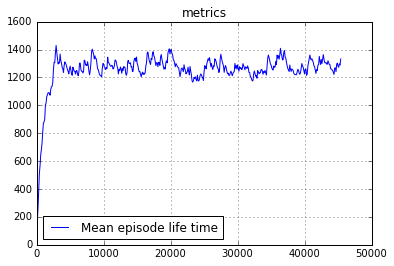

10.0 994
10.0 1092
60.0 2332
10.0 1799
10.0 1898
0.0 1303
0.0 766
20.0 1735
0.0 711
60.0 1953


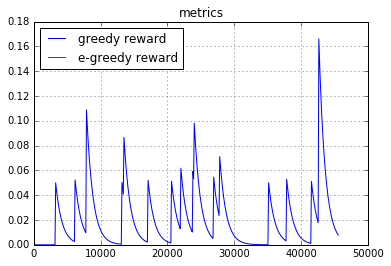

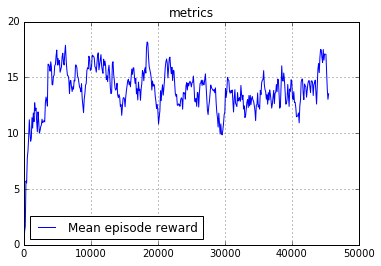

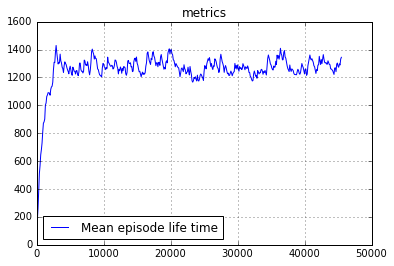

40.0 816
10.0 1278
20.0 807
30.0 730
10.0 1416
10.0 594
30.0 741
10.0 1350
10.0 1117
10.0 1124


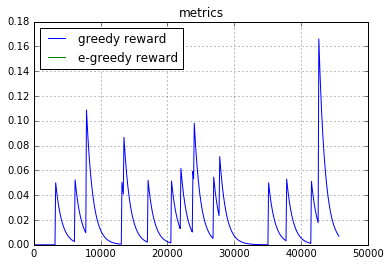

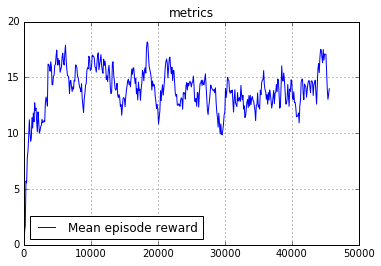

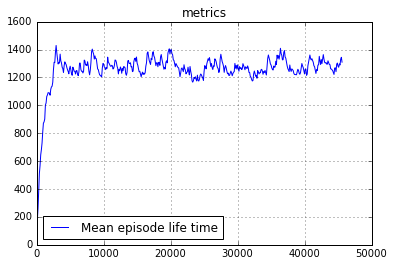

0.0 822
0.0 1387
10.0 2005
10.0 1887
10.0 1917
0.0 1262
0.0 2187
0.0 1165
0.0 1265
0.0 1427


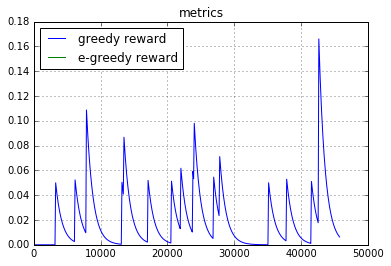

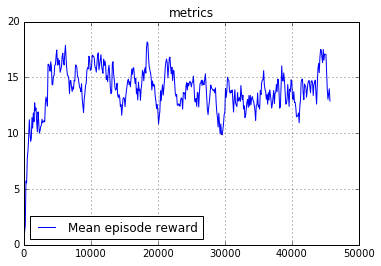

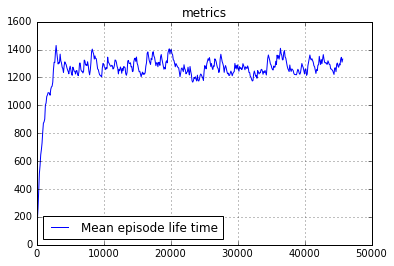

90.0 1330
10.0 1899
0.0 1924
10.0 760
20.0 1912
30.0 2037
0.0 1727
0.0 1787
10.0 2071
10.0 1826


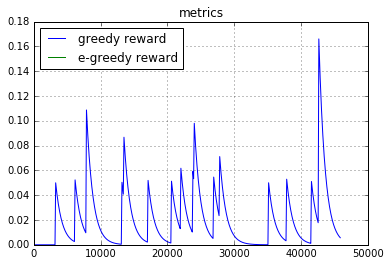

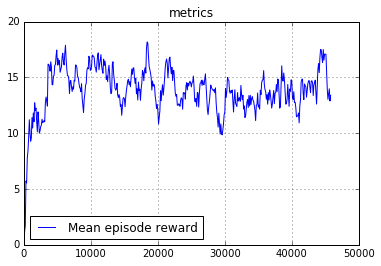

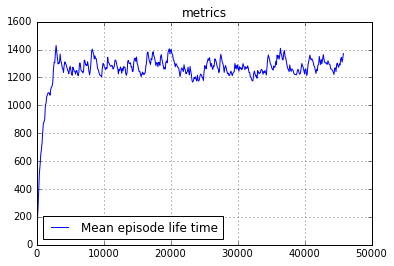

10.0 2009
10.0 1906
0.0 1871
0.0 1818
10.0 736
0.0 1981
0.0 1957
10.0 1263
20.0 1339
10.0 2248


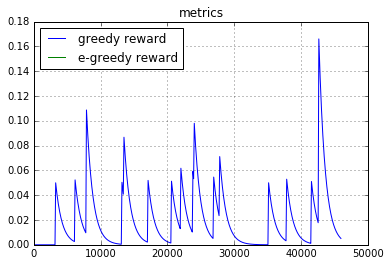

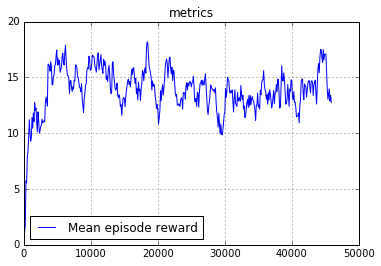

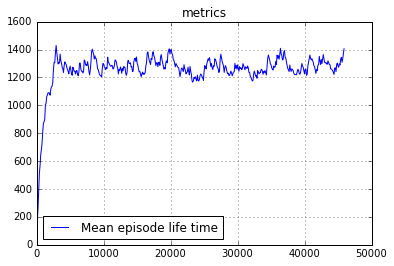

0.0 1428
10.0 1770
10.0 1776
0.0 1246
10.0 1107
10.0 817
0.0 691
0.0 825
10.0 935
0.0 1027


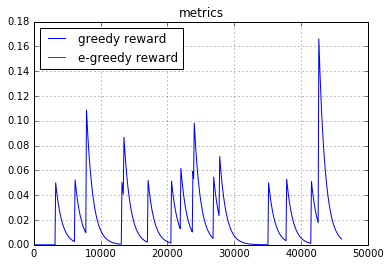

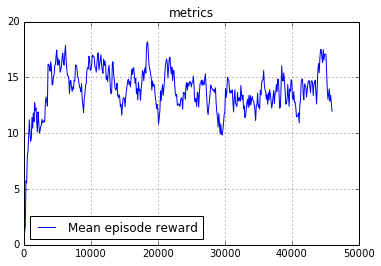

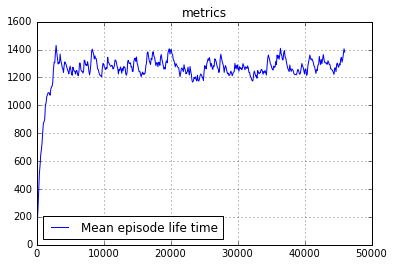

0.0 2027
10.0 1614
0.0 870
0.0 2103
0.0 1994
20.0 1544
10.0 1120
0.0 1990
0.0 988
0.0 758


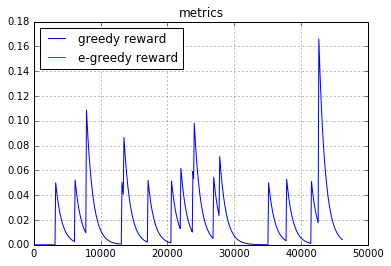

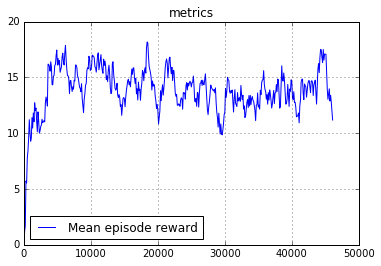

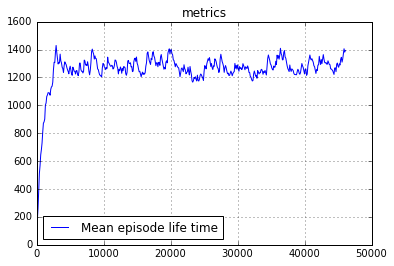

0.0 1254
10.0 1783
0.0 1184
0.0 1143
10.0 748
0.0 1073
20.0 1439
0.0 1130
10.0 1145
0.0 1376


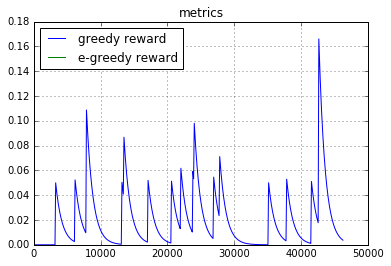

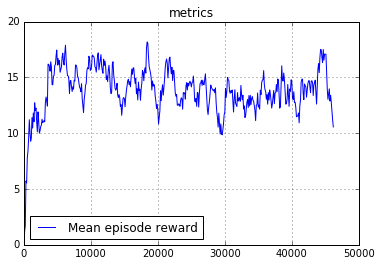

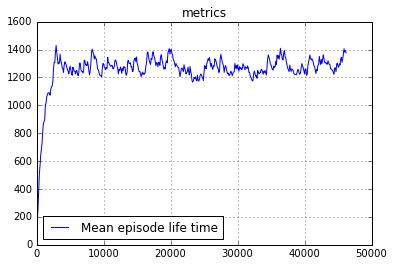

20.0 1111
0.0 1063
0.0 1231
0.0 842
0.0 1031
0.0 1138
0.0 821
10.0 1730
0.0 894
0.0 1521


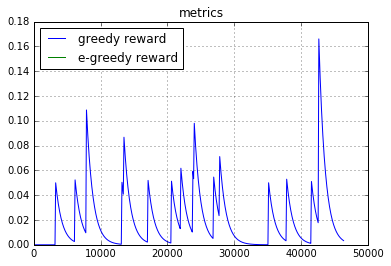

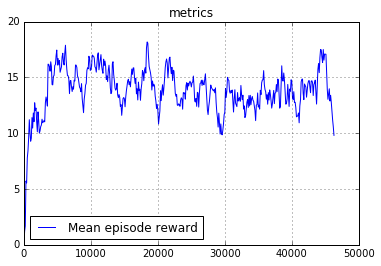

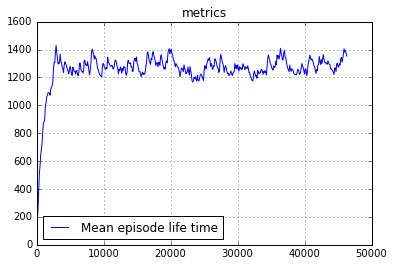

30.0 879
50.0 920
10.0 1355
20.0 931
10.0 1273
10.0 1193
10.0 1185
10.0 775
0.0 767
10.0 1234


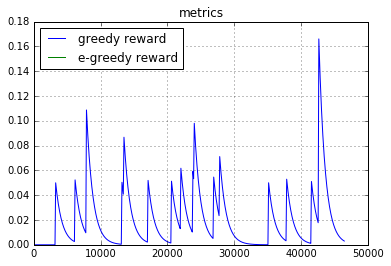

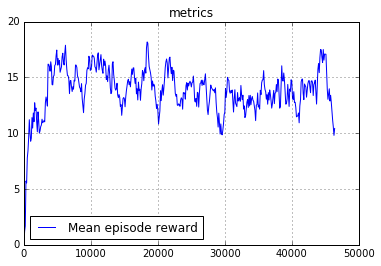

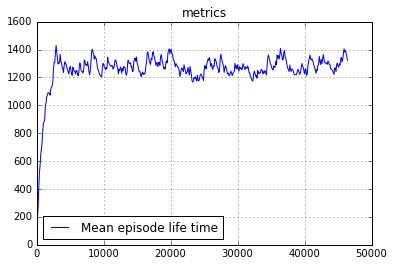

0.0 1131
0.0 844
0.0 1912
0.0 1419
0.0 955
0.0 1441
0.0 1771
20.0 2052
0.0 1504
0.0 1003


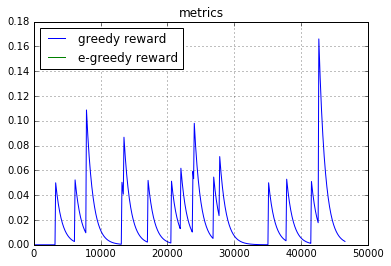

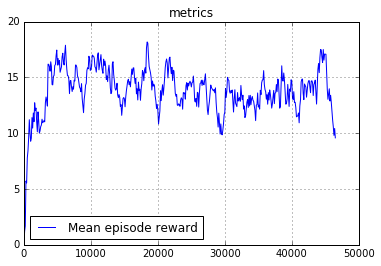

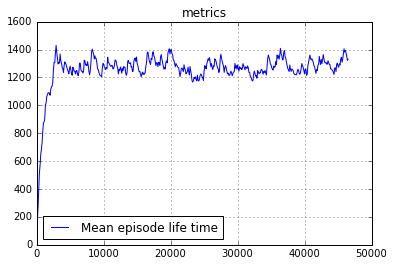

20.0 1589
0.0 1498
10.0 1421
10.0 2002
0.0 1585
10.0 1519
10.0 2153
10.0 726
0.0 1390
10.0 1914


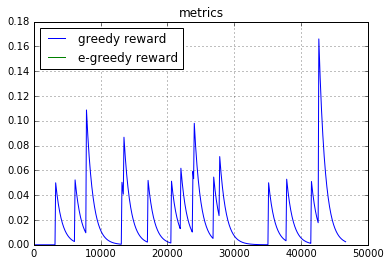

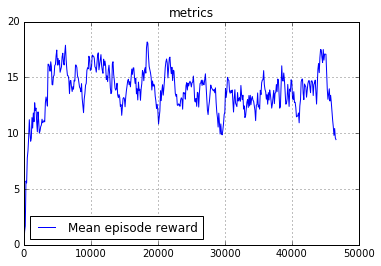

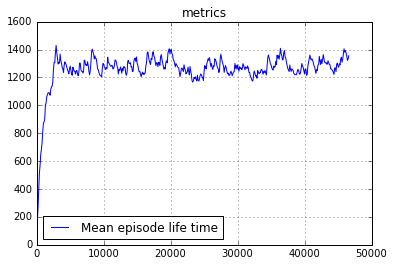

10.0 1057
10.0 1878
30.0 1746
20.0 821
10.0 2073
30.0 621
10.0 1884
30.0 1072
10.0 1913
40.0 1863


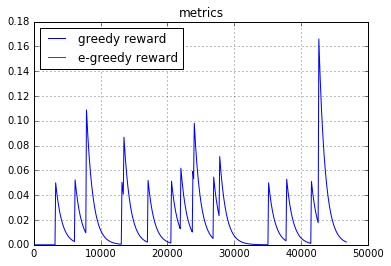

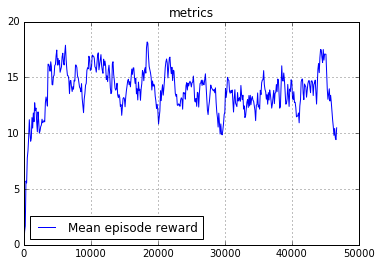

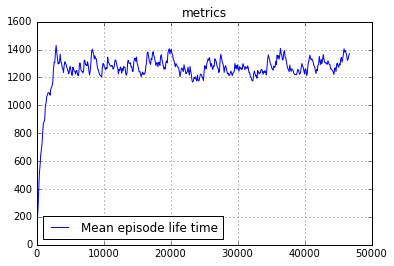

30.0 795
20.0 918
40.0 860
20.0 967
50.0 1056
10.0 843
30.0 1128
40.0 785
10.0 1037
10.0 1402


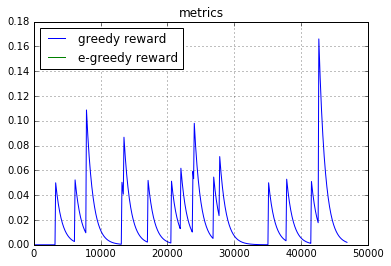

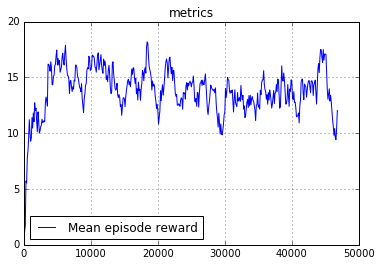

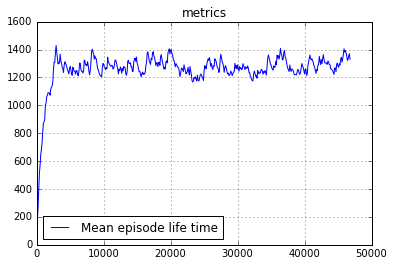

0.0 1410
0.0 1605
0.0 1127
0.0 2327
0.0 595
0.0 1435
0.0 2176
0.0 1389
0.0 812
0.0 2256


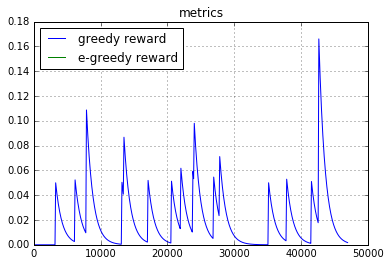

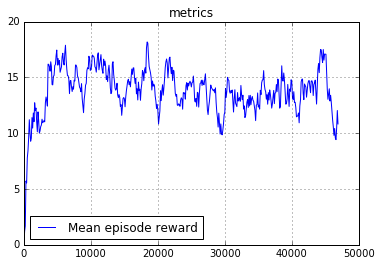

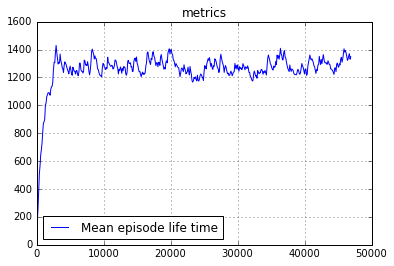

10.0 1048
10.0 1219
20.0 1095
10.0 928
10.0 1057
20.0 1019
10.0 797
10.0 770
10.0 949
10.0 1131


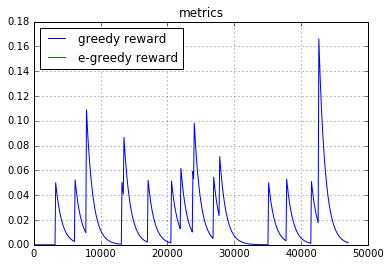

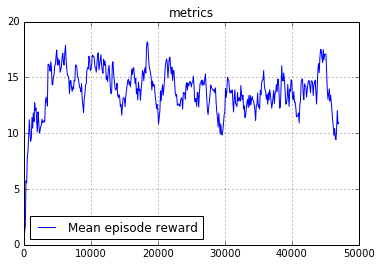

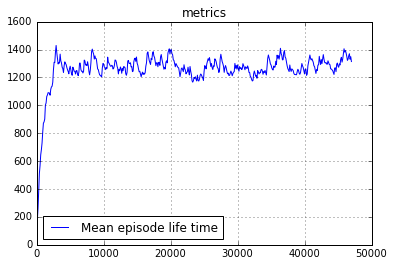

10.0 834
0.0 600
20.0 1813
40.0 1177
10.0 906
10.0 1034
0.0 1554
0.0 2151
0.0 1774
10.0 1267


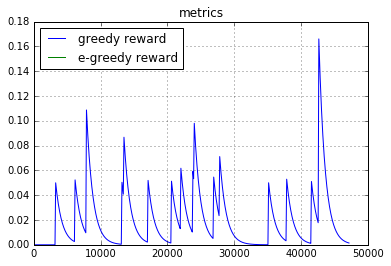

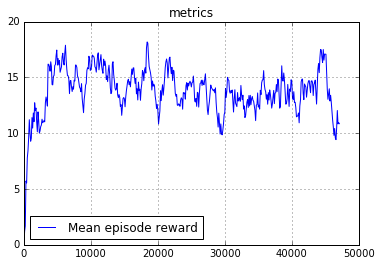

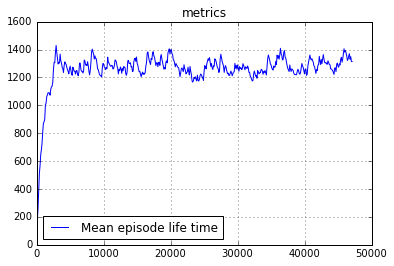

30.0 1881
10.0 2142
10.0 1178
30.0 1500
0.0 2171
30.0 1095
0.0 913
30.0 1090
10.0 954
0.0 1946


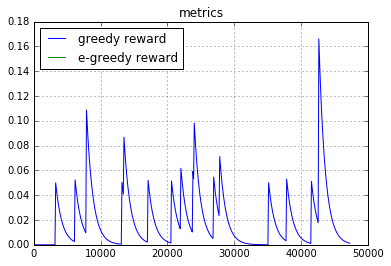

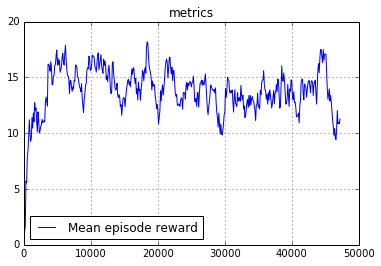

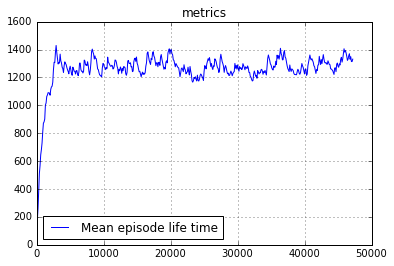

0.0 2186
0.0 1529
30.0 2187
10.0 652
0.0 1504
10.0 2296
40.0 2043
0.0 1573
10.0 1878
0.0 2096


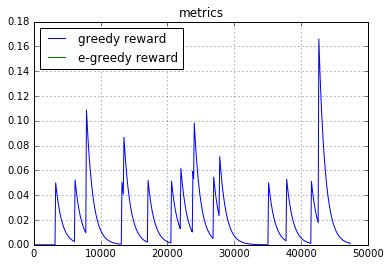

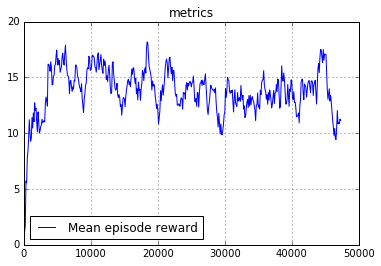

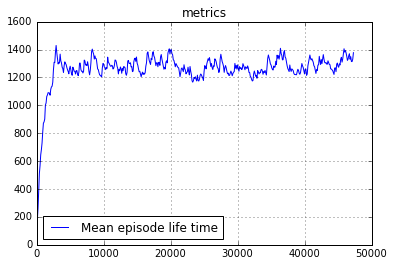

10.0 1215
0.0 962
0.0 984
0.0 822
0.0 832
40.0 1201
10.0 960
20.0 1291
20.0 991
20.0 820


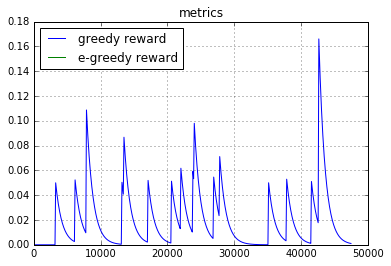

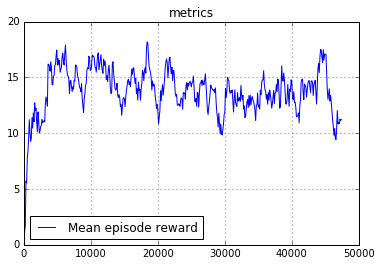

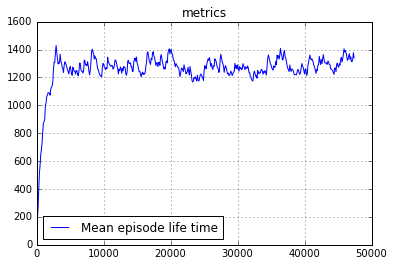

30.0 923
20.0 1437
10.0 1405
30.0 914
30.0 1142
20.0 716
10.0 838
40.0 1327
10.0 779
30.0 1269


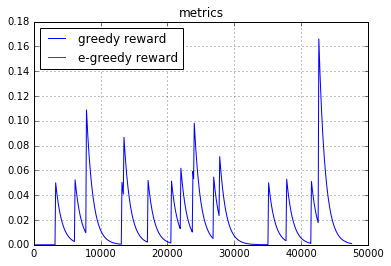

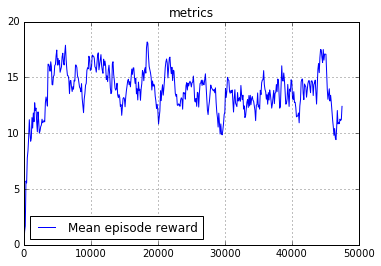

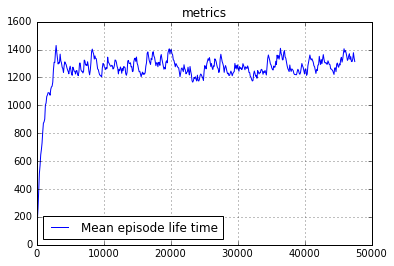

0.0 1523
10.0 1105
10.0 1302
20.0 571
20.0 1175
10.0 1462
10.0 1412
20.0 1566
0.0 1341
20.0 1309


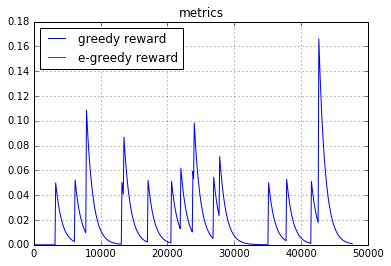

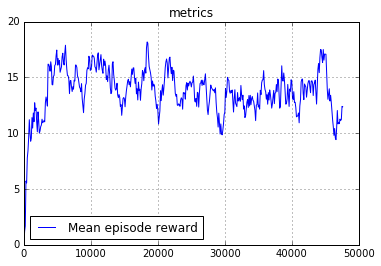

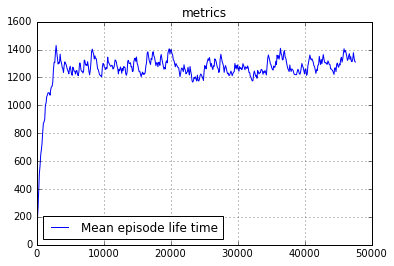

10.0 1400
10.0 1820
10.0 1769
10.0 993
30.0 1230
10.0 1220
10.0 848
10.0 1218
0.0 2316
30.0 1043


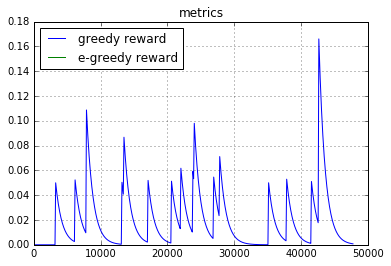

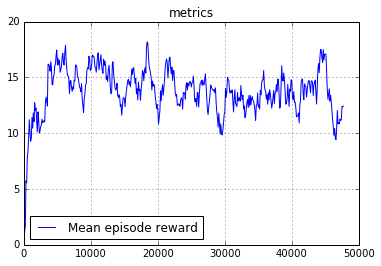

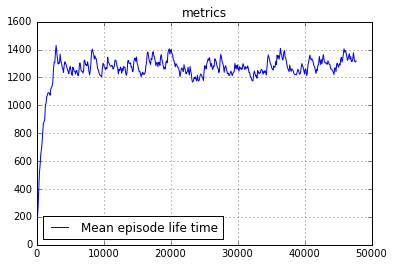

40.0 1230
20.0 1033
30.0 1102
30.0 916
0.0 844
30.0 1169
10.0 876
0.0 1171
10.0 1054
30.0 950


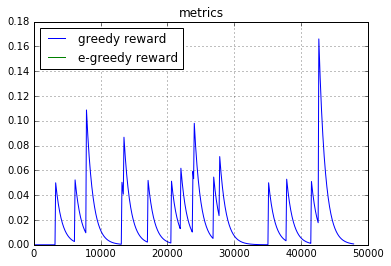

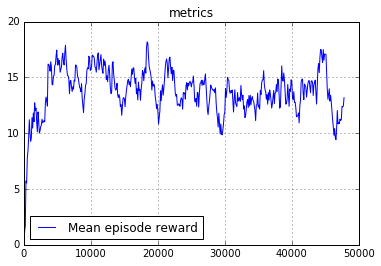

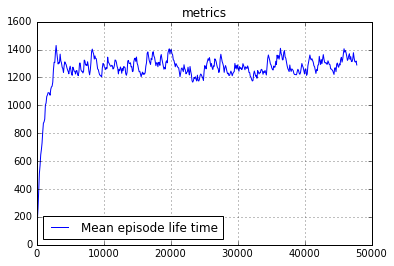

60.0 1095
30.0 1013
30.0 1166
10.0 1971
40.0 1524
40.0 712
70.0 1214
10.0 1208
10.0 1616
10.0 1797


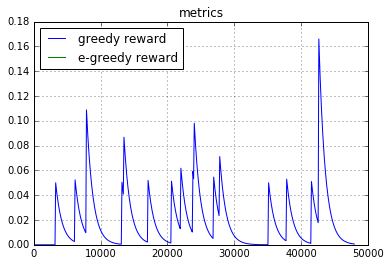

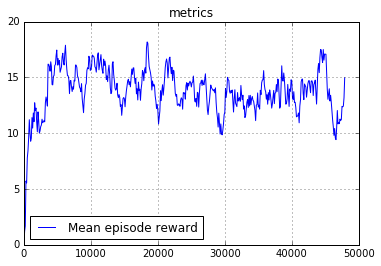

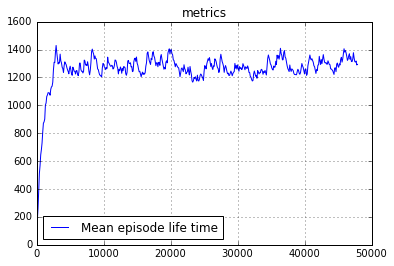

0.0 1395
30.0 2307
0.0 1284
0.0 905
0.0 1568
0.0 1533
0.0 1658
0.0 649
0.0 1478
0.0 699


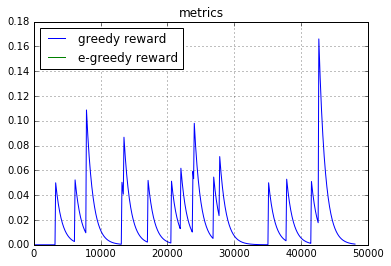

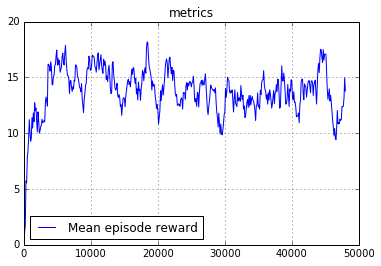

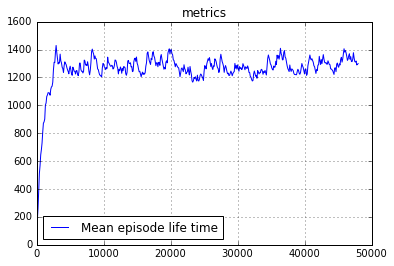

20.0 1500
0.0 1850
20.0 1642
0.0 1756
20.0 1500
10.0 1853
10.0 1219
10.0 1443
40.0 1652
40.0 1202


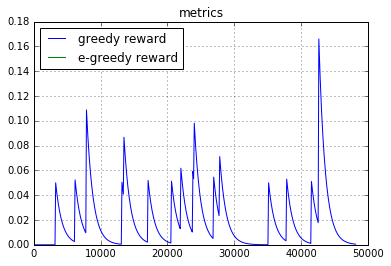

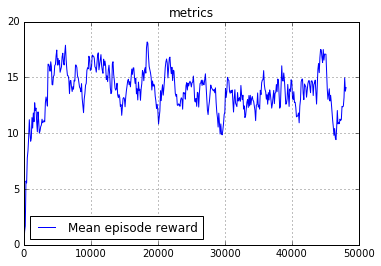

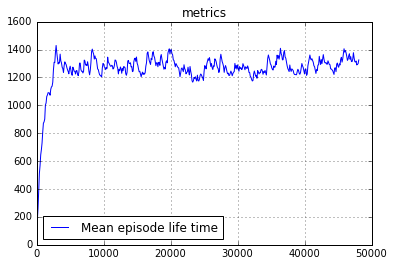

40.0 1256
0.0 1453
0.0 1262
0.0 1017
30.0 1372
10.0 1333
0.0 1428
10.0 1704
60.0 1252
0.0 1198


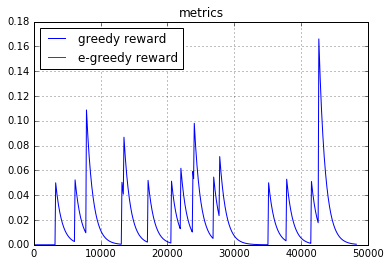

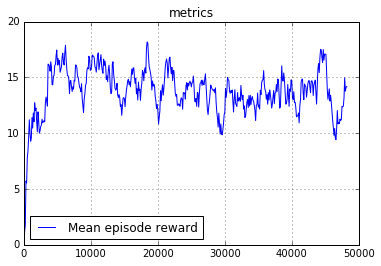

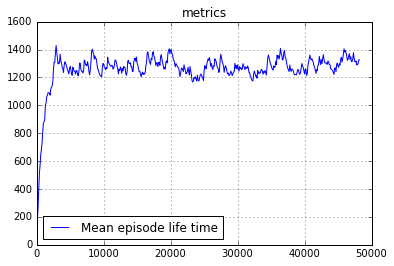

0.0 948
0.0 1148
10.0 1548
30.0 1975
0.0 1336
0.0 640
0.0 1251
0.0 1406
0.0 1139
10.0 992


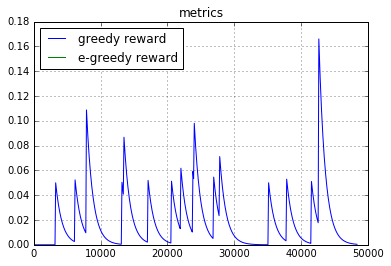

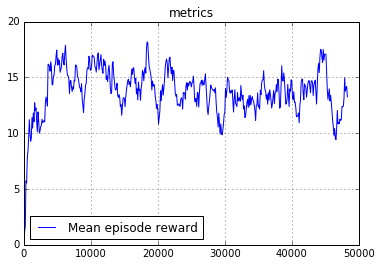

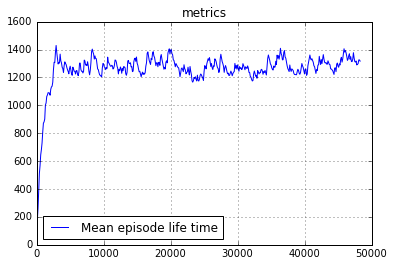

10.0 945
0.0 1050
20.0 1225
30.0 1631
40.0 1265
40.0 1212
40.0 954
10.0 1434
30.0 1406
10.0 1696


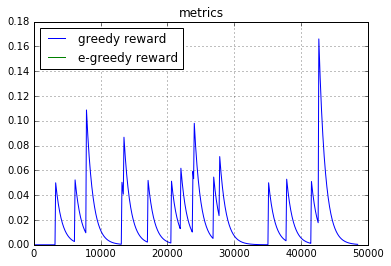

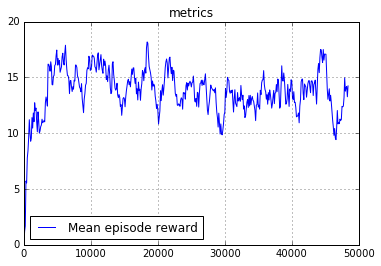

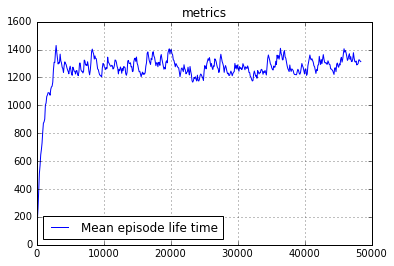

20.0 846
40.0 899
20.0 1628
10.0 1626
20.0 801
10.0 993
20.0 1577
10.0 1555
10.0 1067
20.0 1440


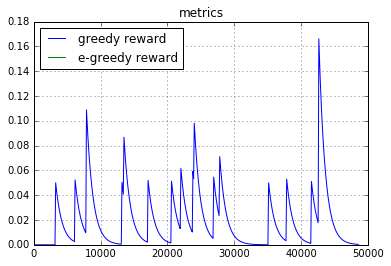

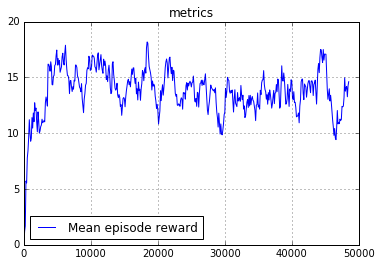

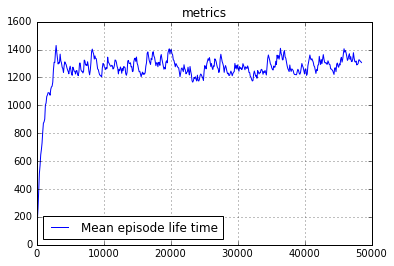

0.0 979
0.0 1331
0.0 1086
0.0 1396
10.0 1157
30.0 1168
0.0 1051
0.0 1180
0.0 1173
0.0 1180


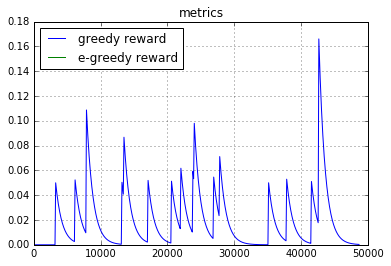

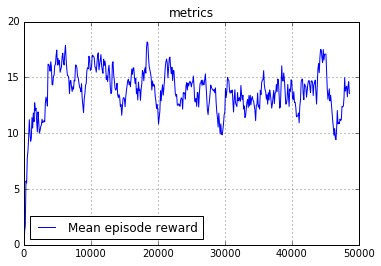

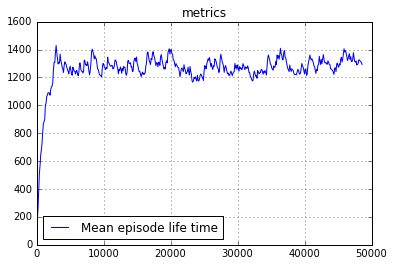

20.0 818
0.0 1444
10.0 1305
10.0 1061
10.0 1160
10.0 882
10.0 767
10.0 777
20.0 999
0.0 1315


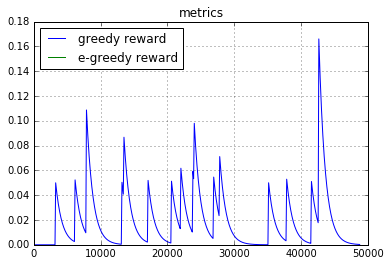

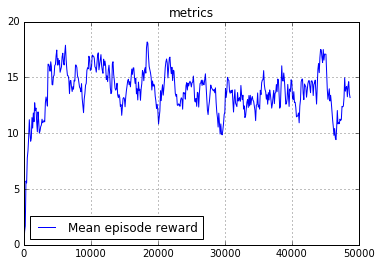

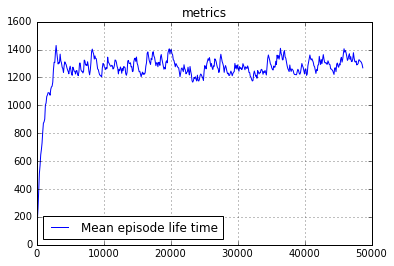

0.0 1459
0.0 1238
0.0 1277
10.0 1868
10.0 1594
10.0 1473
0.0 1939
0.0 869
10.0 2206
0.0 1391


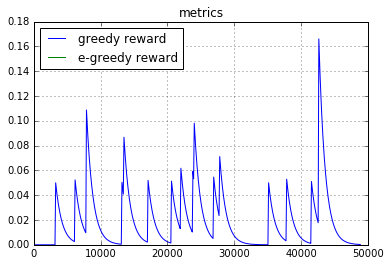

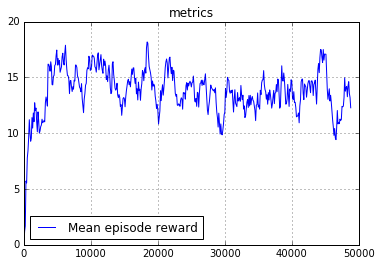

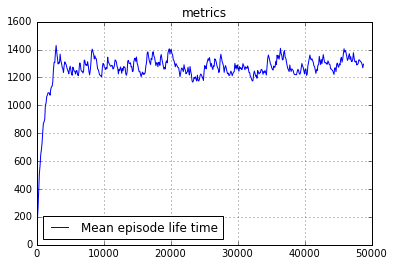

30.0 1757
40.0 1294
0.0 1739
10.0 1662
20.0 1667
0.0 1756
10.0 1290
10.0 1204
0.0 1673
10.0 1932


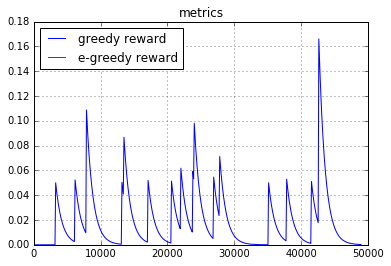

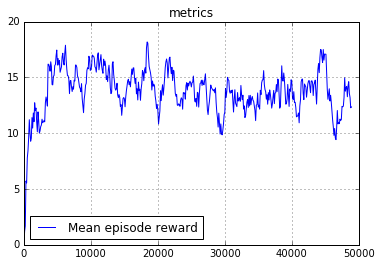

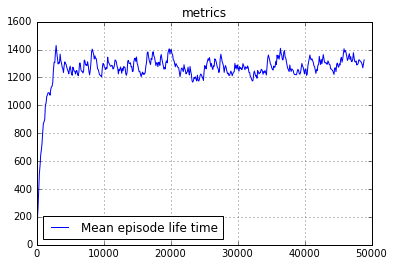

0.0 940
0.0 818
0.0 1900
0.0 1197
0.0 826
0.0 1326
0.0 748
10.0 1557
10.0 1605
10.0 1778


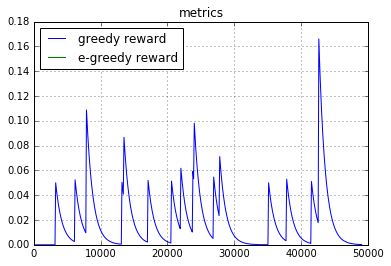

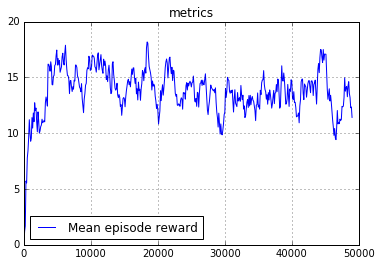

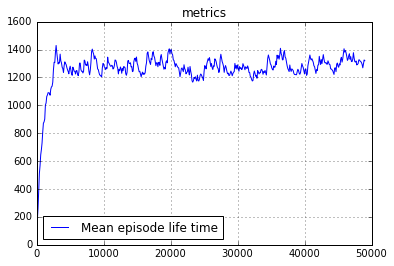

20.0 1146
10.0 1535
70.0 1017
0.0 1490
10.0 1354
10.0 1368
10.0 1378
30.0 918
10.0 1484
10.0 754


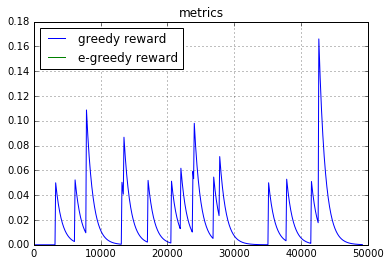

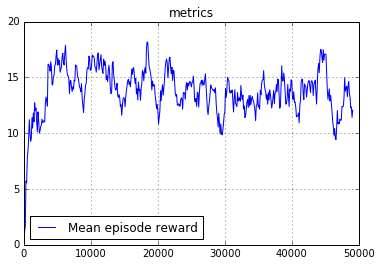

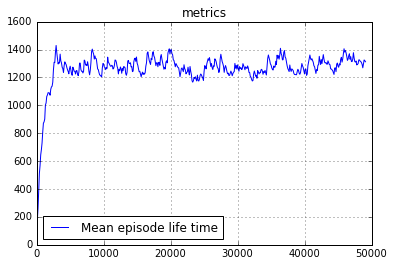

10.0 591
0.0 740
0.0 1437
0.0 815
0.0 1368
0.0 773
10.0 1036
10.0 2074
20.0 1753
0.0 885


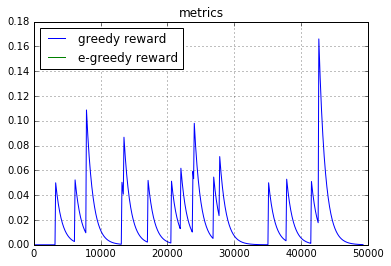

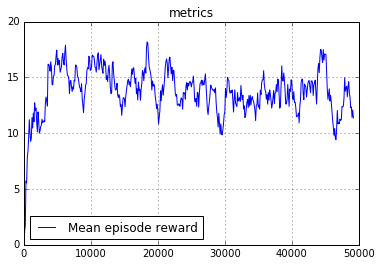

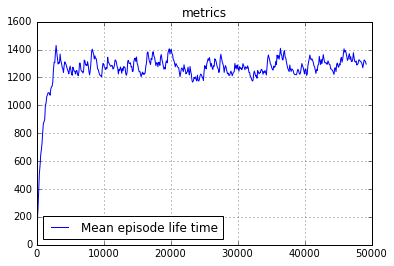

20.0 1032
0.0 1261
50.0 824
10.0 700
0.0 1076
20.0 1007
60.0 879
40.0 1190
20.0 1122
10.0 1176


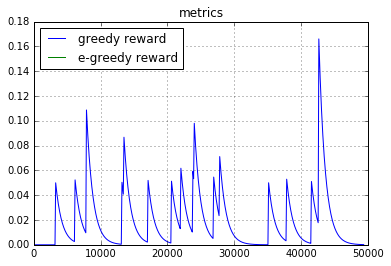

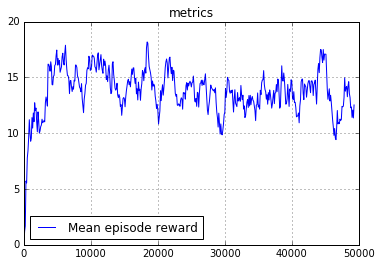

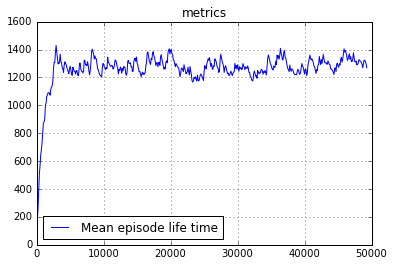

10.0 1259
0.0 807
10.0 1397
20.0 1344
40.0 935
10.0 1136
30.0 903
30.0 910
10.0 1229
20.0 1220


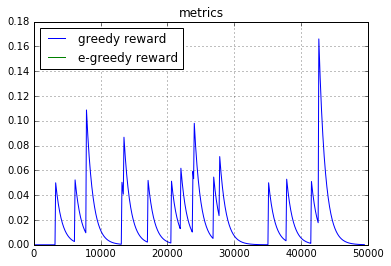

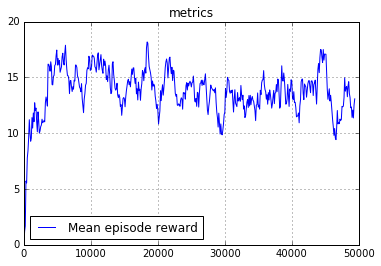

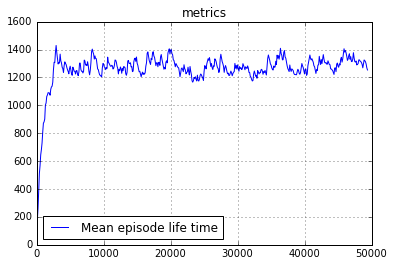

10.0 2077
0.0 638
0.0 750
0.0 906
0.0 2062
10.0 1784
10.0 2033
0.0 653
0.0 694
20.0 1961


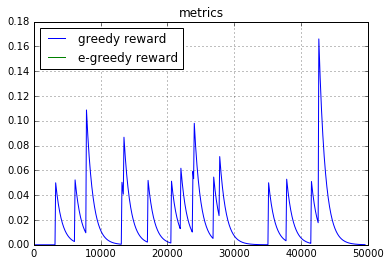

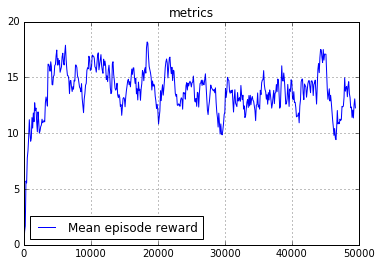

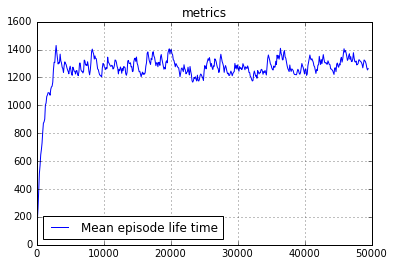

0.0 1018
0.0 1259
10.0 1663
20.0 1457
20.0 2107
0.0 1292
0.0 1327
0.0 1003
0.0 1513


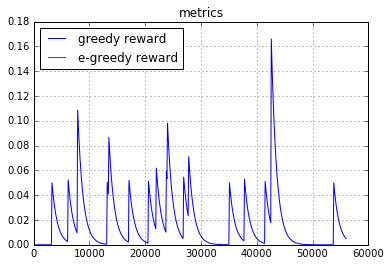

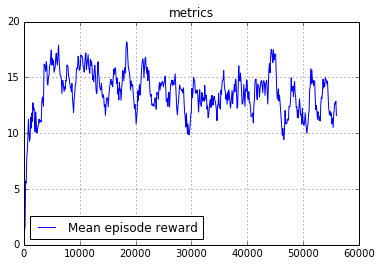

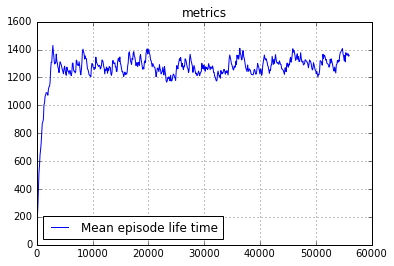

0.0 1031
10.0 1526
10.0 1396
0.0 1095
10.0 2013
0.0 675
0.0 865
10.0 1217
20.0 1774
0.0 1510


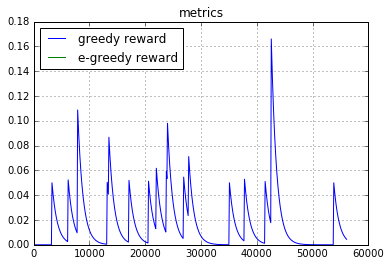

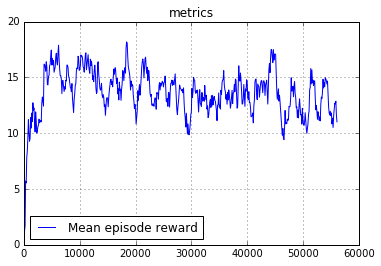

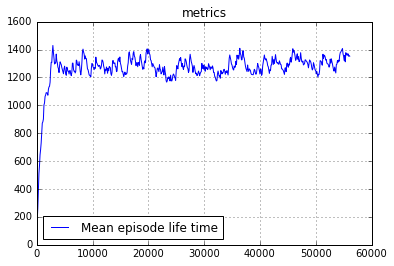

30.0 1502
0.0 1562
10.0 1188
10.0 998
30.0 1218
10.0 1183
10.0 972
0.0 960
30.0 965
0.0 795


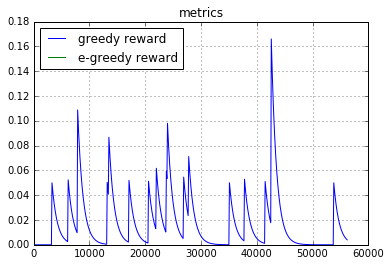

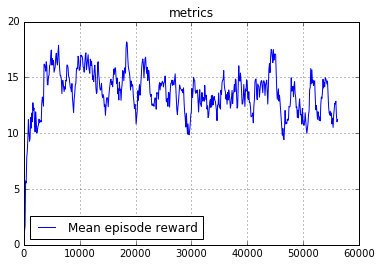

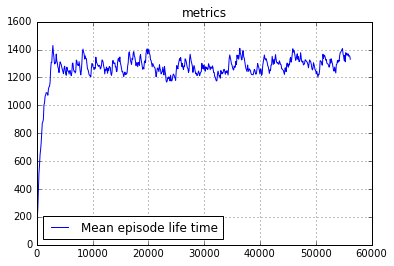

10.0 877
10.0 770
20.0 759
10.0 893
40.0 970
30.0 910
10.0 1020
20.0 1106
10.0 1614
20.0 915


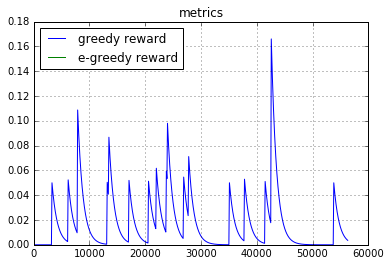

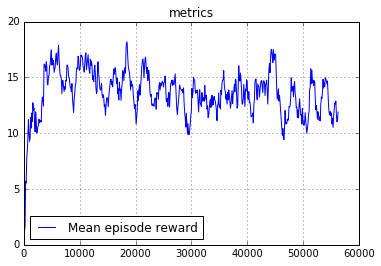

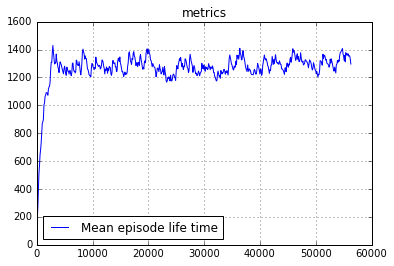

0.0 1874
10.0 2088
0.0 1326
0.0 1540
0.0 2041
0.0 1095
20.0 1349
0.0 2166
0.0 1480
0.0 1522


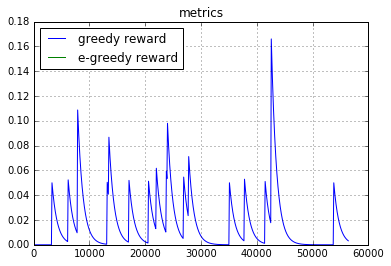

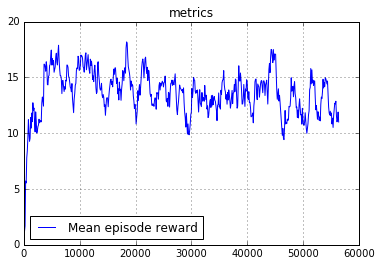

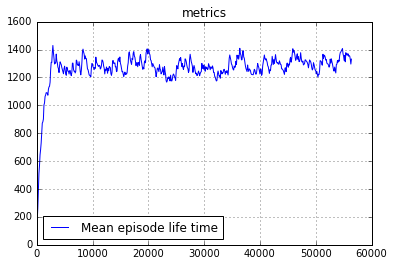

40.0 2096
30.0 822
60.0 1237
10.0 772
70.0 1051
10.0 848
10.0 719
60.0 1199
20.0 1204
10.0 1274


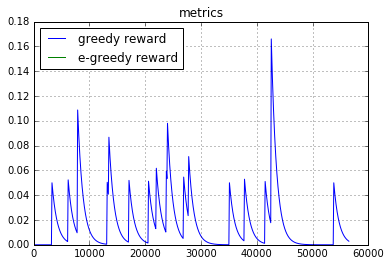

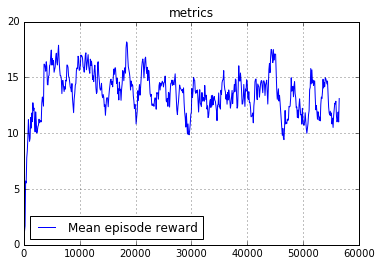

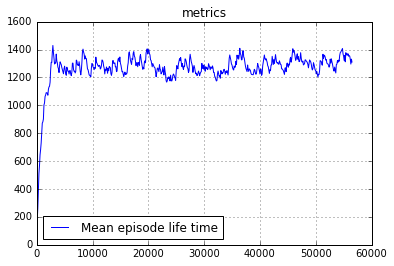

20.0 1982
30.0 1820
10.0 1323
0.0 1933
10.0 2125
30.0 1773
10.0 1784
20.0 2189
10.0 520
10.0 1898


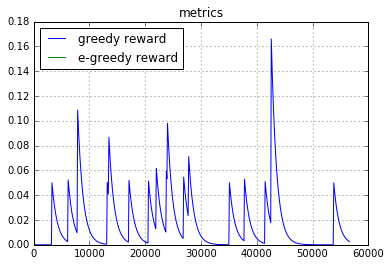

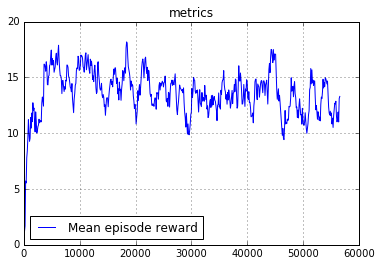

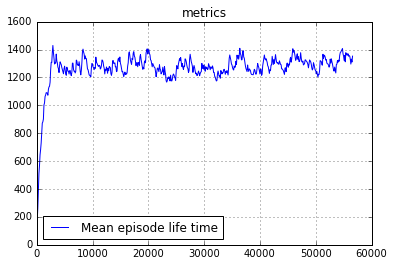

10.0 1014
20.0 804
10.0 1288
10.0 870
0.0 918
10.0 1167
30.0 1348
30.0 1013
10.0 1284
50.0 739


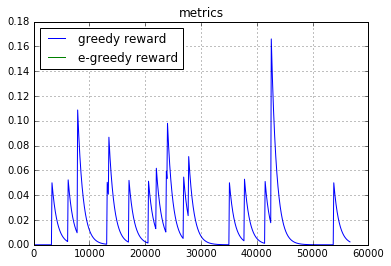

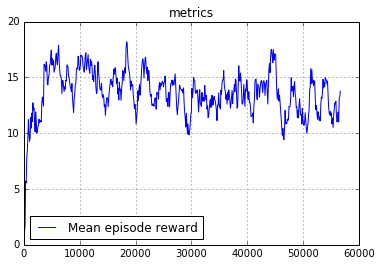

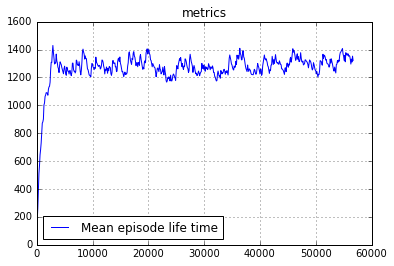

0.0 1052
20.0 1941
0.0 1421
10.0 2255
0.0 762
0.0 1716
0.0 1215
0.0 777
10.0 1428
10.0 1002


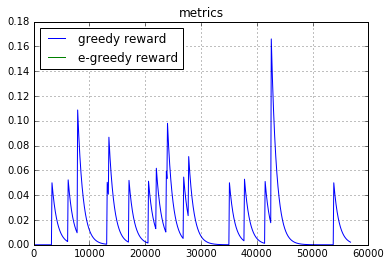

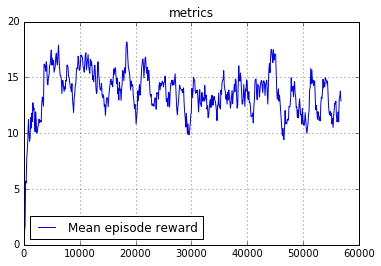

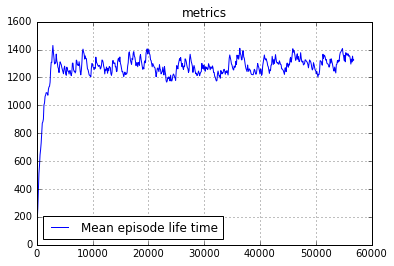

10.0 1195
20.0 1444
60.0 1318
10.0 992
60.0 1330
0.0 1127
10.0 1114
10.0 872
30.0 1336
30.0 1618


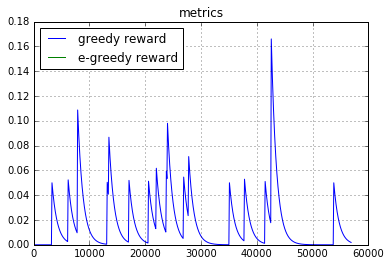

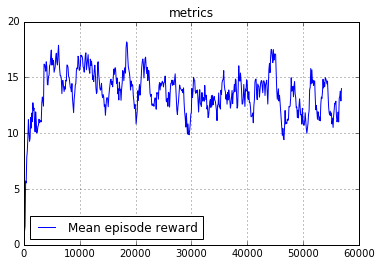

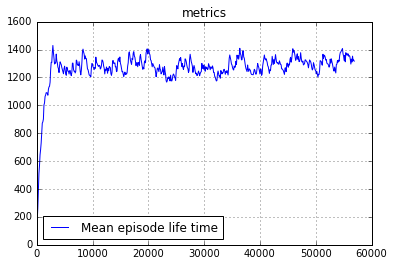

10.0 1509
10.0 1155
40.0 1855
0.0 1567
10.0 1254
10.0 1562
10.0 842
0.0 1799
0.0 1234
0.0 812


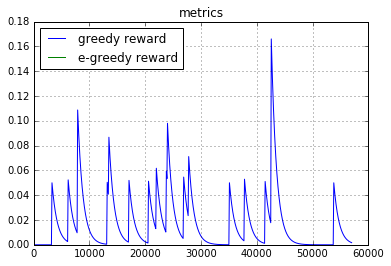

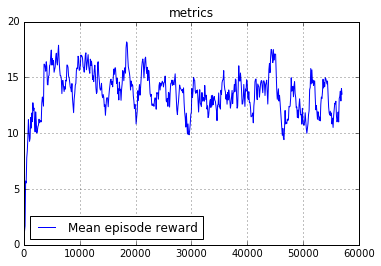

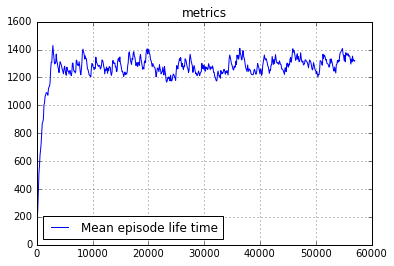

10.0 1559
10.0 1809
10.0 1020
10.0 1979
0.0 1806
30.0 1831
0.0 1446
30.0 1730
0.0 2041
0.0 1987


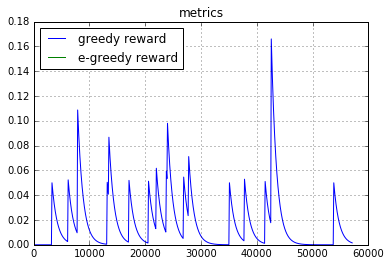

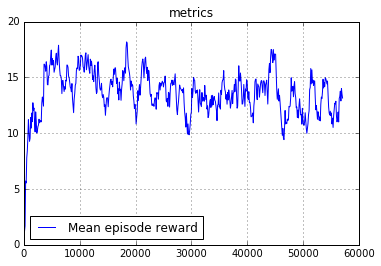

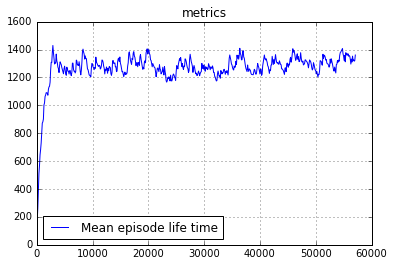

10.0 1794
0.0 1844
0.0 2303
0.0 1322
0.0 1003
0.0 1878
0.0 1498
0.0 1192
0.0 1590
0.0 785


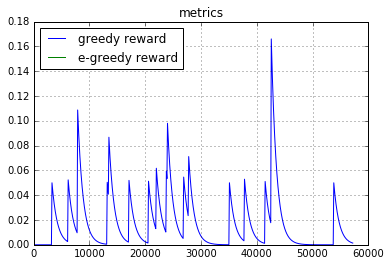

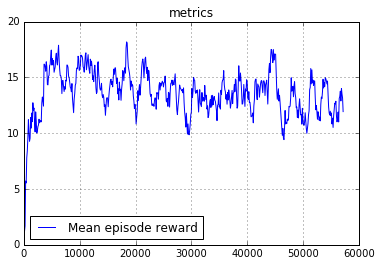

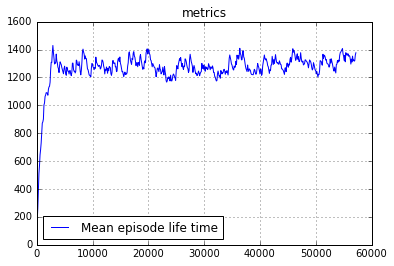

20.0 1524
10.0 777
10.0 1330
10.0 1738
30.0 1070
20.0 1539
20.0 1436
10.0 1101
10.0 1063
10.0 953


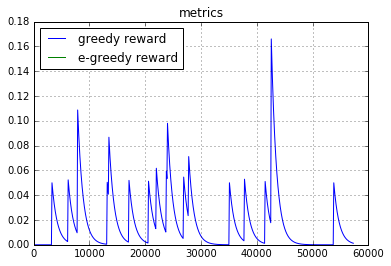

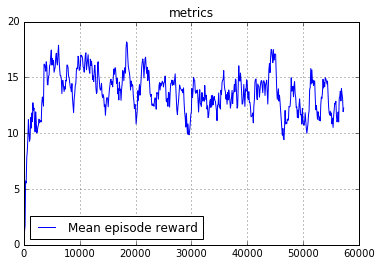

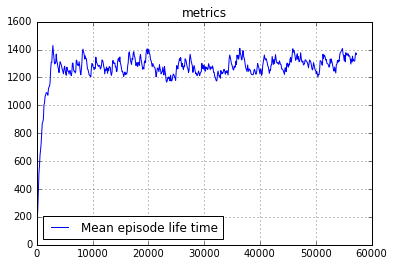

30.0 835
40.0 1250
10.0 1130
10.0 1062
10.0 1162
10.0 1310
10.0 1207
10.0 1120
30.0 1222
30.0 913


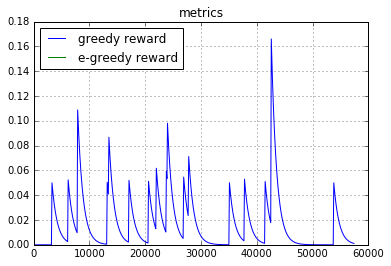

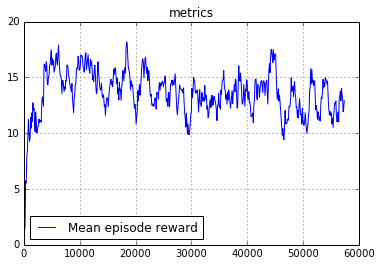

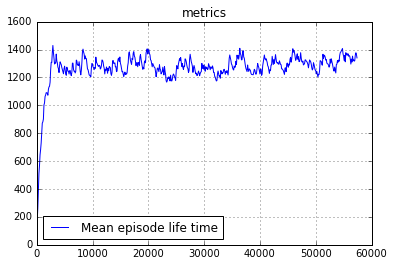

0.0 1077
0.0 1346
0.0 1341
0.0 653
0.0 1346
0.0 1686
0.0 799
0.0 849
0.0 672
0.0 1195


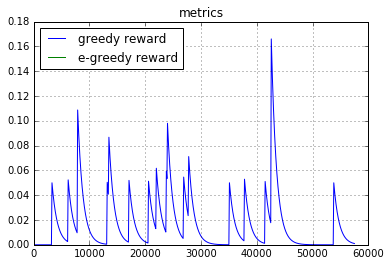

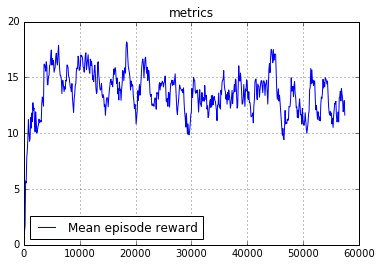

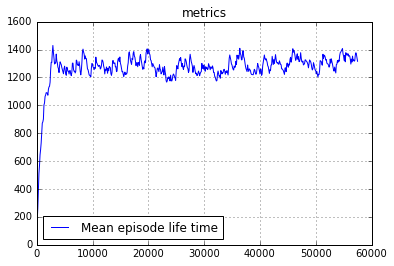

0.0 831
30.0 1947
10.0 1064
10.0 1837
30.0 1542
10.0 1822
10.0 1166
10.0 976
30.0 1043
10.0 1032


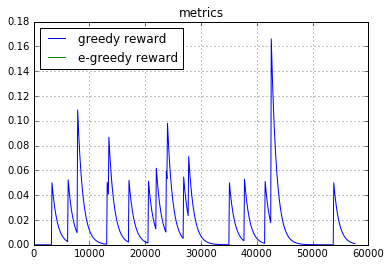

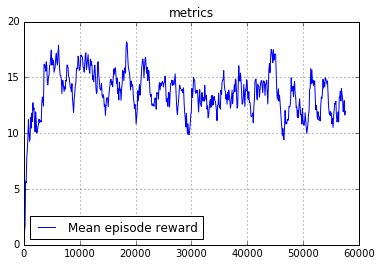

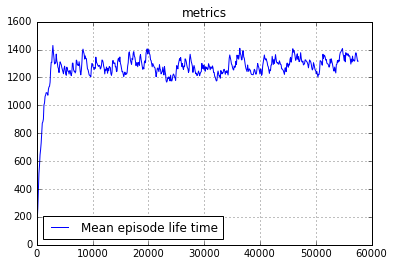

50.0 1117
70.0 1008
10.0 1656
10.0 1424
40.0 1003
10.0 1550
10.0 1442
0.0 1336
30.0 1290
40.0 1437


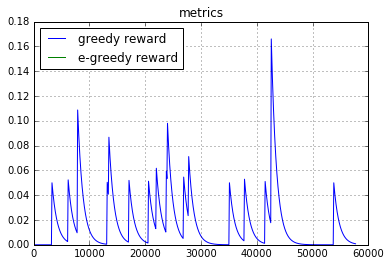

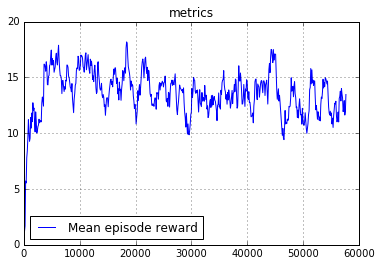

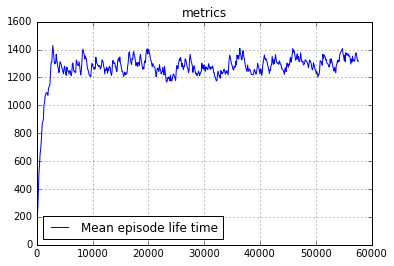

10.0 1621
10.0 1703
0.0 2155
0.0 1271
10.0 1846
0.0 1745
0.0 2015
0.0 768
0.0 807
10.0 1821


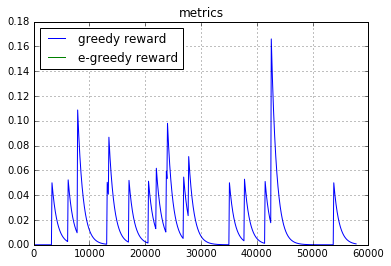

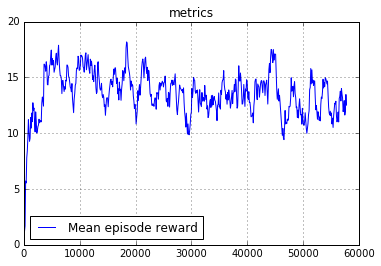

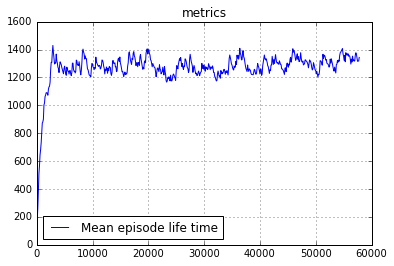

10.0 981
20.0 1514
10.0 1447
10.0 844
10.0 1145
20.0 774
40.0 1385
20.0 885
10.0 996
10.0 1217


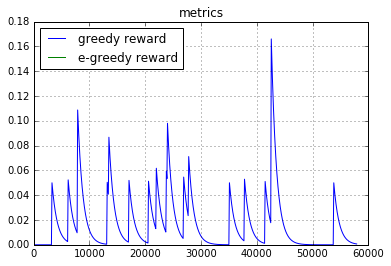

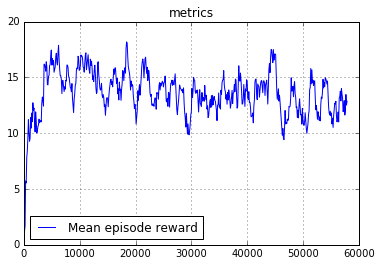

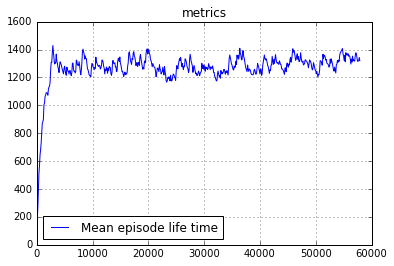

10.0 1851
0.0 1754
0.0 2032
0.0 2025
0.0 2004
10.0 1895
10.0 1754
0.0 1769
0.0 2051
0.0 1973


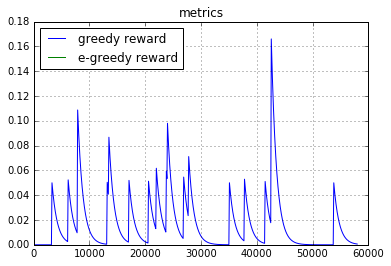

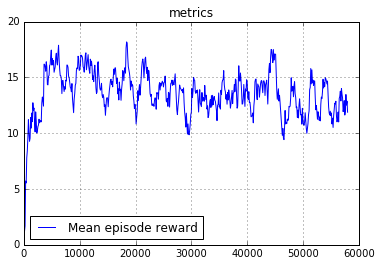

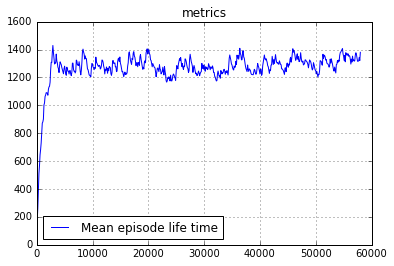

0.0 1436
0.0 1562
10.0 1309
0.0 1446
10.0 1078
30.0 2295
0.0 1191
0.0 1467
10.0 2096
20.0 1441


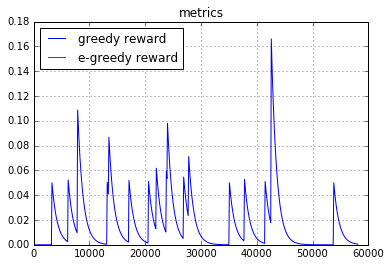

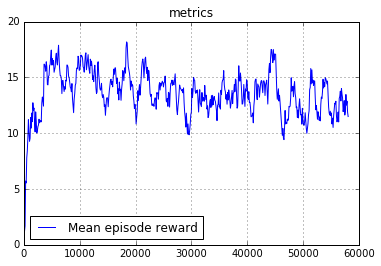

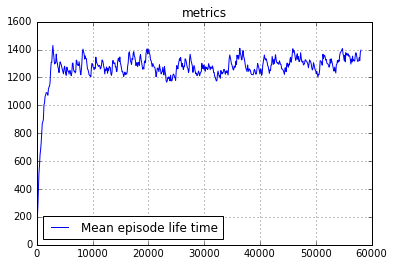

20.0 1049
0.0 902
20.0 1167
10.0 1253
20.0 881
40.0 888
40.0 1081
20.0 929
20.0 721
10.0 984


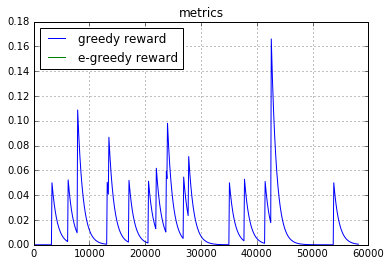

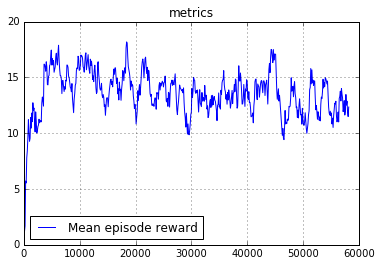

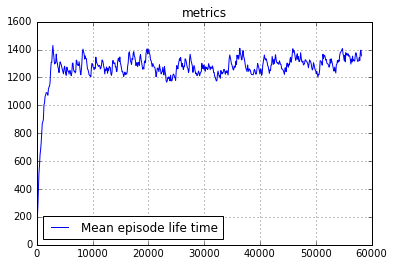

10.0 990
10.0 1922
50.0 1363
20.0 1429
0.0 1635
10.0 1303
30.0 1140
0.0 1807
10.0 1577
60.0 1129


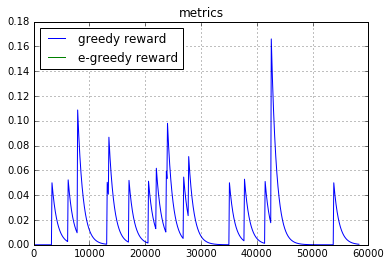

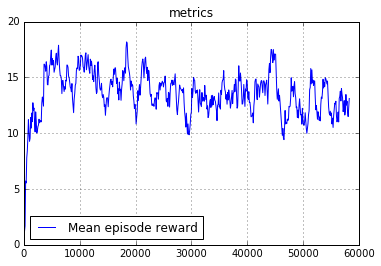

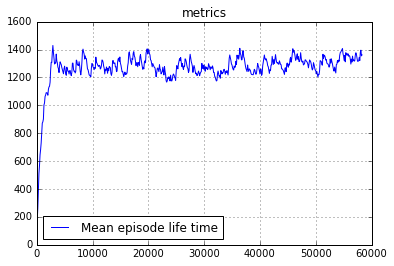

0.0 1460
0.0 1246
0.0 1071
0.0 1137
0.0 1287
30.0 1214
10.0 1086
10.0 1276
10.0 1177
0.0 1059


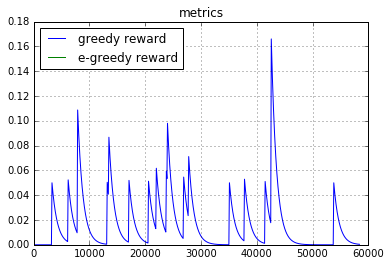

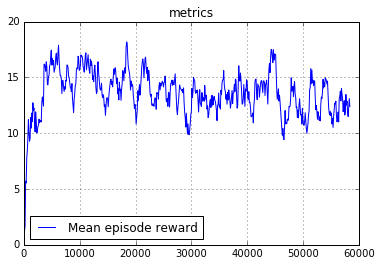

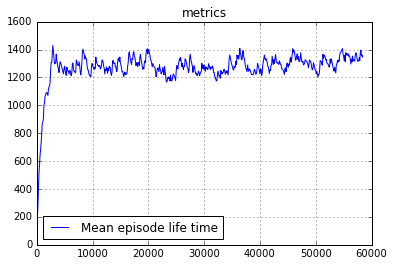

0.0 2083
10.0 1025
0.0 1621
30.0 1381
0.0 1542
0.0 620
30.0 1533
0.0 1522
10.0 1637
10.0 1962


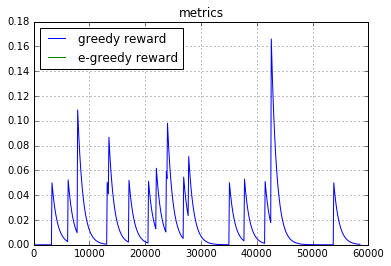

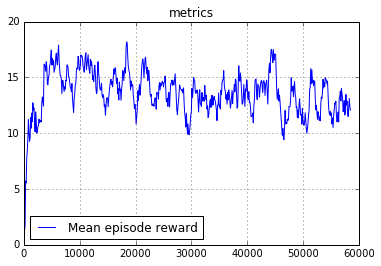

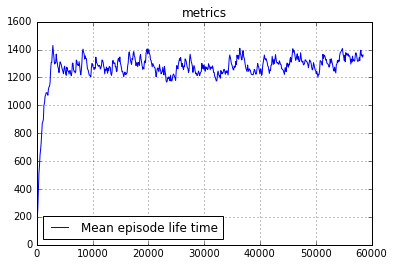

30.0 1008
10.0 1344
0.0 1391
10.0 708
10.0 1456
30.0 954
20.0 1251
0.0 785
20.0 1189
30.0 1314


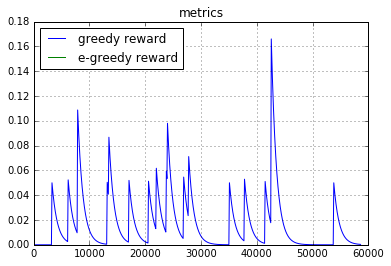

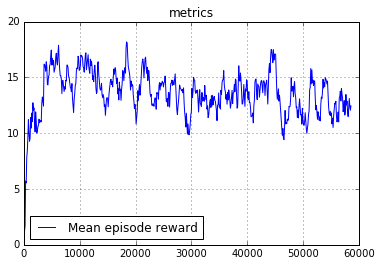

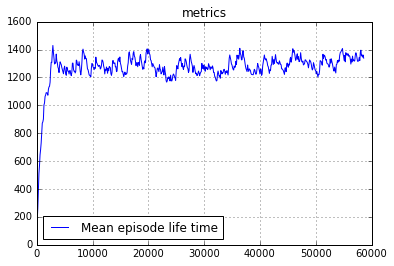

10.0 1644
30.0 1463
20.0 1087
20.0 1265
20.0 1397
10.0 770
10.0 1590
20.0 1208
0.0 867
0.0 1546


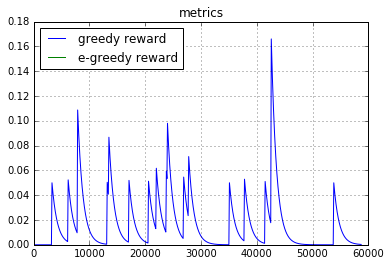

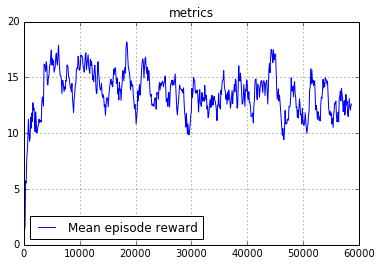

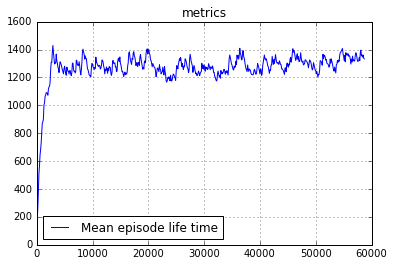

0.0 1735
0.0 1575
0.0 1112
10.0 1882
0.0 1199
0.0 1752
0.0 1115
0.0 1630
0.0 1714
0.0 2114


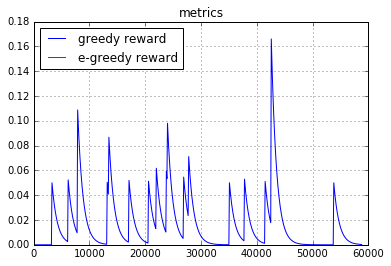

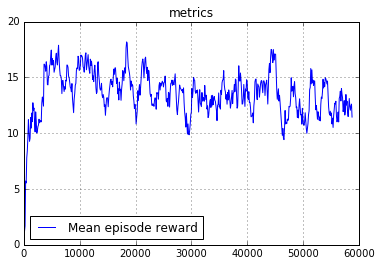

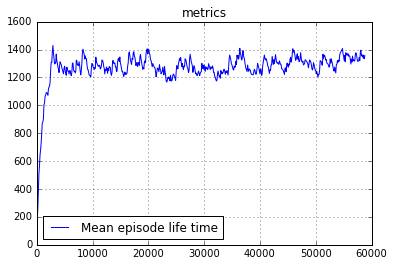

30.0 1043
140.0 1106
10.0 797
10.0 775
20.0 695
0.0 1370
10.0 899
0.0 911
10.0 606
40.0 861


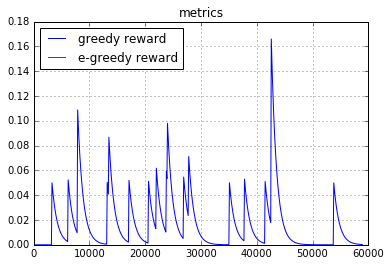

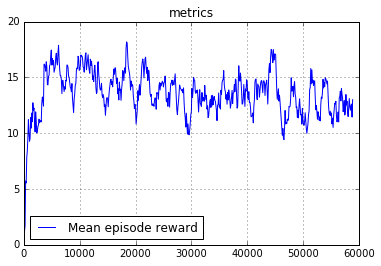

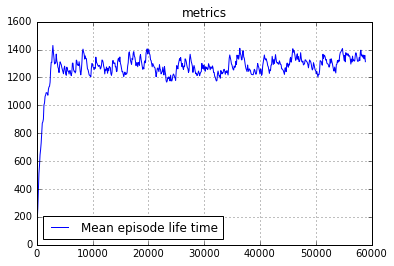

10.0 1193
10.0 2000
0.0 1618
10.0 1196
0.0 1749
30.0 775
10.0 803
0.0 1742
10.0 1115
70.0 926


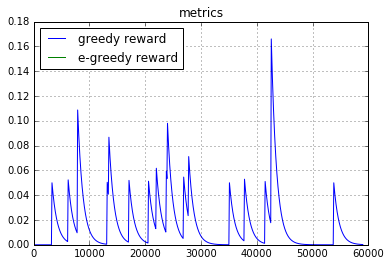

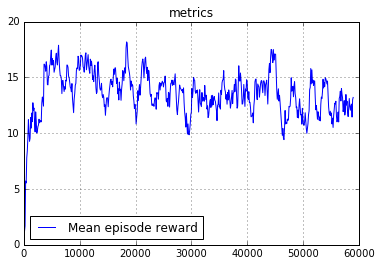

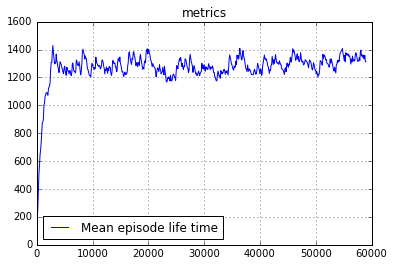

0.0 1693
10.0 1995
10.0 1933
0.0 1805
10.0 2301
10.0 1779
0.0 2208
0.0 2237
0.0 2122
0.0 1557


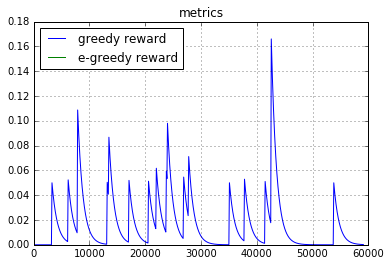

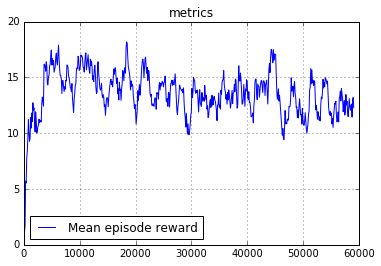

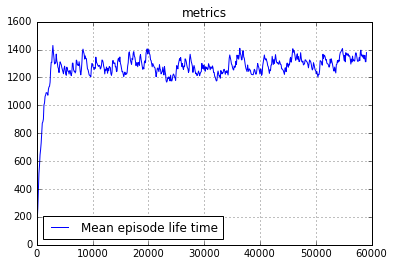

30.0 944
20.0 1183
30.0 1266
10.0 827
40.0 1426
20.0 1267
10.0 1212
10.0 995
10.0 776
30.0 925


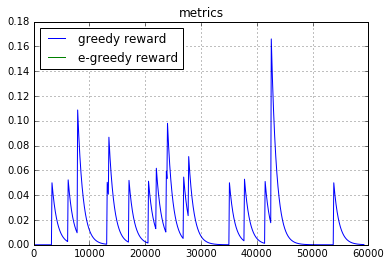

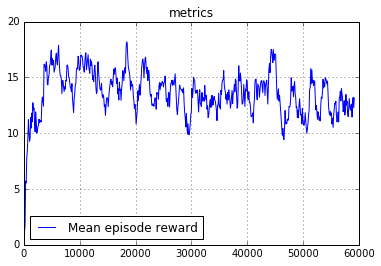

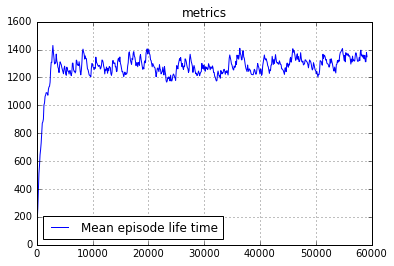

20.0 831
30.0 1238
70.0 1251
10.0 872
30.0 1037
20.0 786
10.0 787
10.0 1305
20.0 972
10.0 928


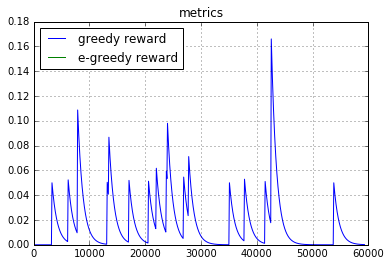

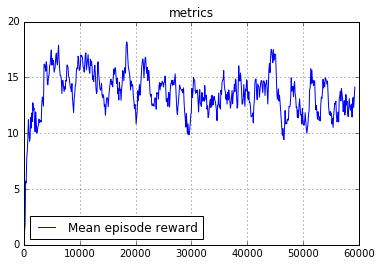

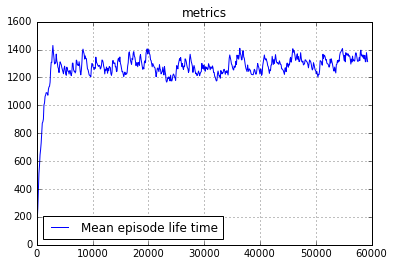

10.0 757
100.0 1163
10.0 1075
30.0 1289
10.0 1076
10.0 1401
40.0 852
0.0 1407
0.0 1114
0.0 1682


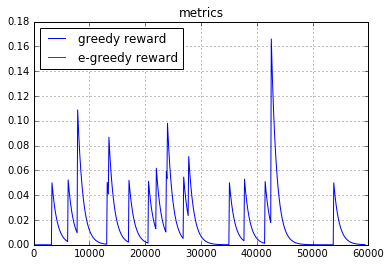

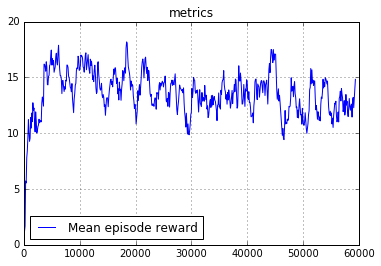

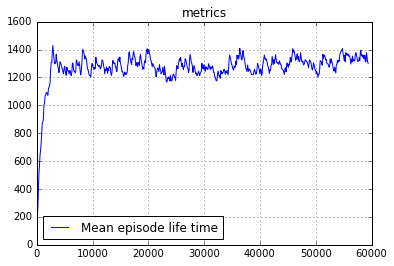

10.0 1462
10.0 1290
60.0 1132
0.0 1146
10.0 1373
0.0 887
0.0 1010
10.0 838
0.0 1374
0.0 1419


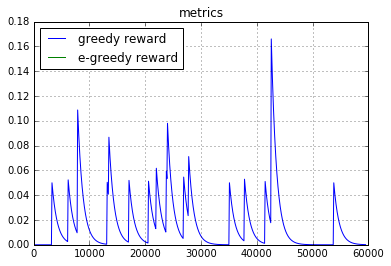

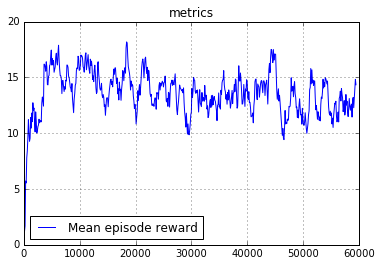

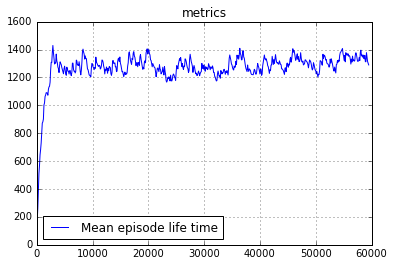

10.0 1377
20.0 1308
30.0 943
30.0 816
10.0 1316
20.0 1084
30.0 1101
60.0 1167
0.0 1095
10.0 662


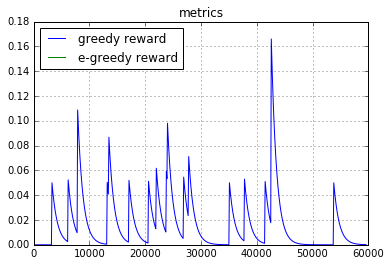

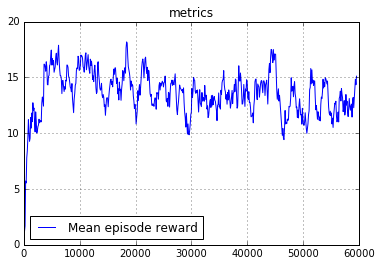

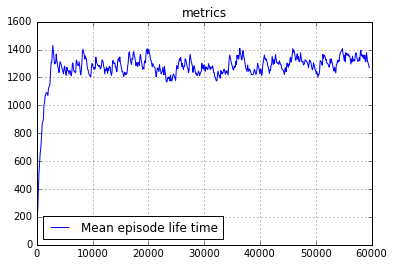

10.0 1400
10.0 1842
0.0 1446
0.0 1622
10.0 1786
10.0 1487
10.0 1680
0.0 1666
0.0 1359
0.0 1514


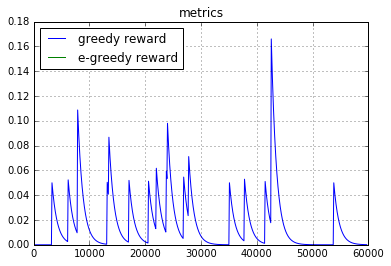

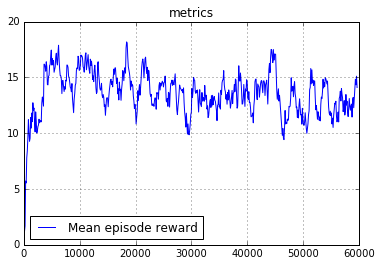

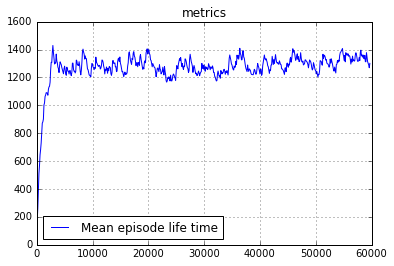

20.0 927
20.0 811
50.0 1129
40.0 1099
10.0 882
50.0 1406
10.0 1763
20.0 1628
0.0 1828
20.0 1175


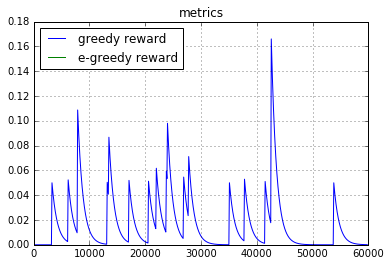

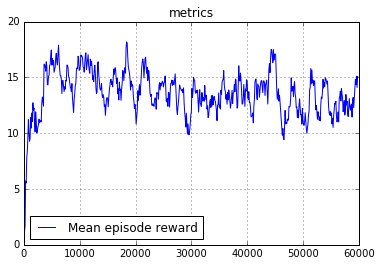

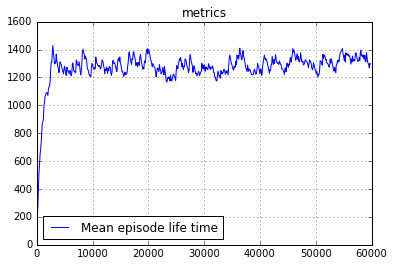

0.0 1244
0.0 1190
10.0 1233
0.0 1566
20.0 1211
30.0 953
10.0 1399
10.0 1445
40.0 1407
20.0 809


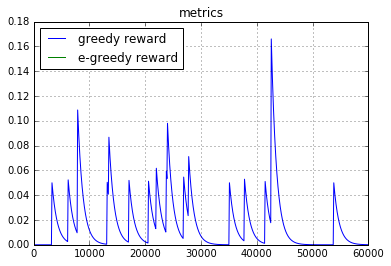

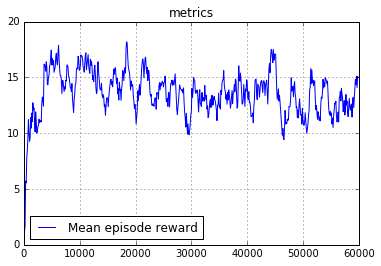

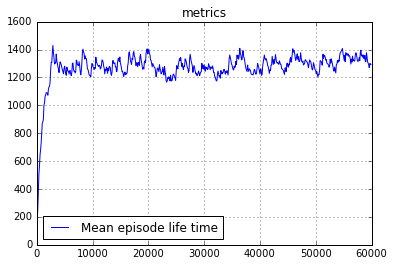

In [ ]:
n_epochs = 151
for i in xrange(n_epochs):
    my_agent.fit(n_epochs=100)
    epoch_counter+=100
    evaluator.update_learning_curves(my_agent.eval_fun, 'greedy', epoch_counter, update_ep=True)
    evaluator.display_learning_curves()
    save(my_agent.resolver, "no_exp_last.pcl")

## Results

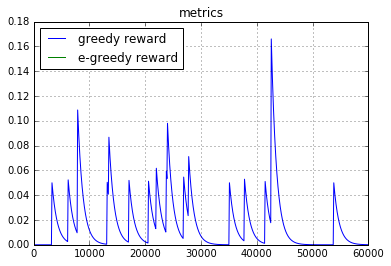

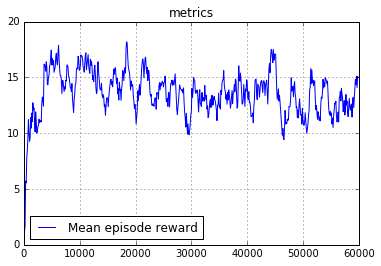

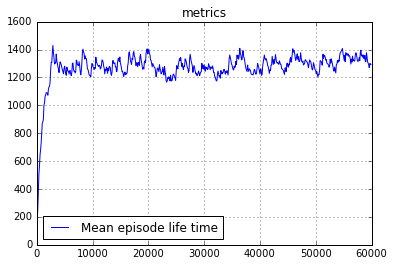

In [23]:
evaluator.display_learning_curves()

## Saving results and params

In [24]:
from agentnet.utils.persistence import save,load
save(my_agent.resolver, "no_exp_last.pcl")

In [25]:
lc = {'Mean episode reward':evaluator.reward_log['Mean episode reward']}
pickle.dump(lc, open('no_exp_reward_log.pcl', 'wb'))
lc = {'greedy_reward':evaluator.score_log['greedy reward']}
pickle.dump(lc, open('no_exp_score_log.pcl', 'wb'))
lc = {'Mean episode life time':evaluator.life_time_log['Mean episode life time']}
pickle.dump(lc, open('no_exp_time_log.pcl', 'wb'))

In [ ]:
my